In [1]:
>>> pip install copia

Note: you may need to restart the kernel to use updated packages.


In [2]:
import copia

print(dir(copia))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'abundance_barplot', 'abundance_histogram', 'accumulation_curve', 'ace', 'chao1', 'density_plot', 'diversity', 'egghe_proot', 'empirical_hill', 'empirical_richness', 'estimated_hill', 'estimators', 'evenness', 'evenness_plot', 'functional_attribute_diversity', 'hill_numbers', 'hill_plot', 'iChao1', 'jackknife', 'min_add_sample', 'minsample_diagnostic_plot', 'multi_kde_plot', 'plot', 'shared_richness', 'stats', 'survival_errorbar', 'utils']


this is the result from colab: ['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'abundance_counts', 'abundance_histogram', 'accumulation_curve', 'ace', 'chao1', 'density', 'diversity', 'egghe_proot', 'empirical_richness', 'evenness_plot', 'hill', 'hill_plot', 'iChao1', 'jackknife', 'min_add_sample', 'minsample_diagnostic_plot', 'multi_kde', 'plot', 'richness', 'species_accumulation', 'stats', 'survival_errorbar', 'utils']

In [3]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(543251) # control random seed

import copia.utils as u
from copia.estimators import *
from copia import hill_numbers
from copia.stats import survival_ratio
from copia.diversity import evenness
from copia.plot import accumulation_curve
from copia.plot import multi_kde_plot
from copia.plot import survival_errorbar
from copia.plot import evenness_plot
from copia.plot import density_plot
from copia.plot import hill_plot


plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['ytick.minor.left'] = False

In [4]:
import pandas as pd
import glob
import os

# 初始化一个空字典用于存储不同语言的DataFrame
lits = {}

# 遍历文件夹中的所有CSV文件
for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
    # 跳过不需要处理的文件
    if 'anglo-norman' in fn:
        continue
    
    # 读取CSV文件
    df = pd.read_csv(fn)
    
    # 从文件名中提取语言名称，并转换为小写
    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    
    # 将提取的'username', 'language', 'work_id'列存储到字典中
    lits[lang] = df[['username', 'language', 'work_id']]

# 输出结果检查
for lang, data in lits.items():
    print(f"Language: {lang}")
    print(data.head())



Language: bahasa_indonesia
          username          language   work_id
0   dianthus_peony  Bahasa Indonesia  36657928
1        Reyan3779  Bahasa Indonesia  36657928
2       CuddlyWorm  Bahasa Indonesia  36657928
3  jinkook_married  Bahasa Indonesia  36657928
4      agustDRkive  Bahasa Indonesia  36657928
Language: português_brasileiro
    username              language   work_id
0   nic_ckie  Português brasileiro  35195854
1   KimIsa15  Português brasileiro  32475397
2  velezhard  Português brasileiro  32475397
3   bunny445  Português brasileiro  32475397
4    Lunnary  Português brasileiro  32475397
Language: chinese
            username language   work_id
0           xiaowwai  chinese  40244955
1         kwonorange  chinese  40244955
2              EM_WX  chinese  40244955
3  mintchocolatemint  chinese  40244955
4      aaaaaaa_aaaaa  chinese  40244955
Language: english
        username language   work_id
0      camote_24  english  39739578
1       AdaoraKi  english  39739578
2  end

Language: bahasa_indonesia
          username          language   work_id
0   dianthus_peony  Bahasa Indonesia  36657928
1        Reyan3779  Bahasa Indonesia  36657928
2       CuddlyWorm  Bahasa Indonesia  36657928
3  jinkook_married  Bahasa Indonesia  36657928
4      agustDRkive  Bahasa Indonesia  36657928
Language: português_brasileiro
    username              language   work_id
0   nic_ckie  Português brasileiro  35195854
1   KimIsa15  Português brasileiro  32475397
2  velezhard  Português brasileiro  32475397
3   bunny445  Português brasileiro  32475397
4    Lunnary  Português brasileiro  32475397
Language: chinese
            username language   work_id
0           xiaowwai  chinese  40244955
1         kwonorange  chinese  40244955
2              EM_WX  chinese  40244955
3  mintchocolatemint  chinese  40244955
4      aaaaaaa_aaaaa  chinese  40244955
Language: english
        username language   work_id
0      camote_24  english  39739578
1       AdaoraKi  english  39739578
2  end

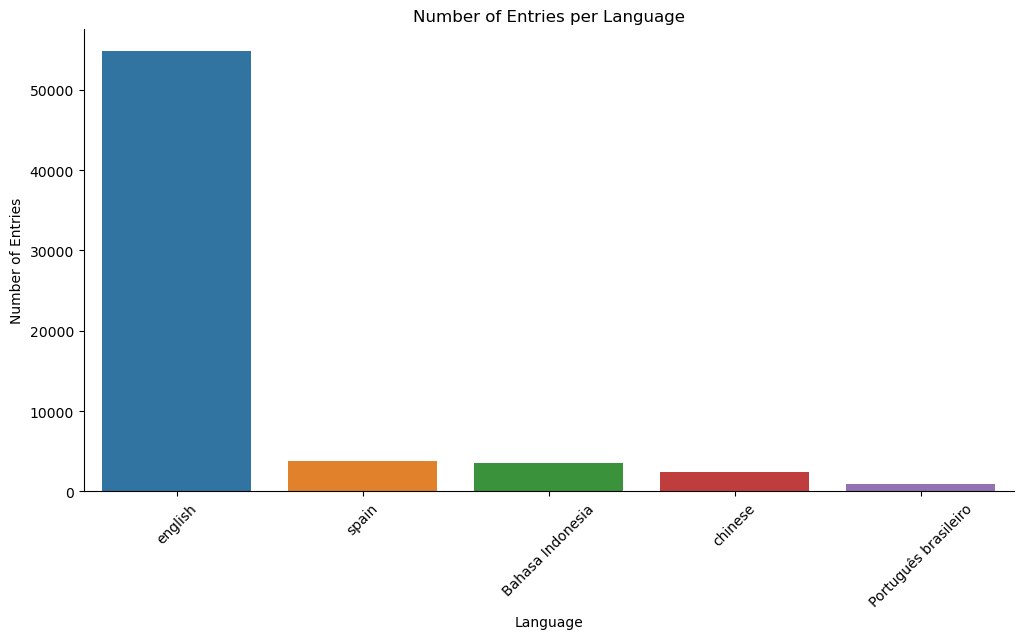

In [6]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 初始化一个空字典用于存储不同语言的DataFrame
lits = {}

# 遍历文件夹中的所有CSV文件
for fn in sorted(glob.glob('/Users/josiechen/desktop/prepared data/*.csv')):
    # 跳过不需要处理的文件
    if 'anglo-norman' in fn:
        continue
    
    # 读取CSV文件
    df = pd.read_csv(fn)
    
    # 从文件名中提取语言名称，并转换为小写
    lang = os.path.basename(fn).replace('prepared data_', '').replace('.csv', '').lower()
    
    # 将提取的'username', 'language', 'work_id'列存储到字典中
    lits[lang] = df[['username', 'language', 'work_id']]

# 输出结果检查
for lang, data in lits.items():
    print(f"Language: {lang}")
    print(data.head())

# 合并所有语言的数据
all_data = pd.concat(lits.values(), ignore_index=True)

# 查看合并后的数据
print(all_data.head())

# 创建一个柱状图展示每种语言的数据量
plt.figure(figsize=(12, 6))
sns.countplot(data=all_data, x='language', order=all_data['language'].value_counts().index)
plt.title('Number of Entries per Language')
plt.xlabel('Language')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()


In [11]:

def to_abundance(series):  
    return series.value_counts().to_dict()

def basic_stats(abundance):
    s = {
        'f1': sum(1 for count in abundance.values() if count == 1),
        'f2': sum(1 for count in abundance.values() if count == 2),
        'S': len(abundance),
        'n': sum(abundance.values())
    }
    return s

stats = []
for lit, df in lits.items():
    abundance = to_abundance(df['username'])
    s = basic_stats(abundance)
    d = {'language': lit}
    for k in ('f1', 'f2', 'S', 'n'):
        d[k] = s[k]
   
    stats.append(d)

print(stats)


[{'language': 'bahasa_indonesia', 'f1': 787, 'f2': 263, 'S': 1398, 'n': 3505}, {'language': 'português_brasileiro', 'f1': 458, 'f2': 83, 'S': 589, 'n': 871}, {'language': 'chinese', 'f1': 504, 'f2': 145, 'S': 885, 'n': 2371}, {'language': 'english', 'f1': 21462, 'f2': 6273, 'S': 32731, 'n': 54772}, {'language': 'spain', 'f1': 1706, 'f2': 401, 'S': 2389, 'n': 3759}]


In [13]:
# 转换为 DataFrame
stats_df = pd.DataFrame(stats)

# 将 language 列的值转换为小写形式
stats_df['language'] = stats_df['language'].str.lower()

# 计算并添加总和行
total_row = ['all'] + list(stats_df[['f1', 'f2', 'S', 'n']].sum()) 
stats_df.loc[len(stats_df)] = total_row

# 将 language 列设置为索引
stats_df = stats_df.set_index('language')

print(stats_df)


                          f1    f2      S      n
language                                        
bahasa_indonesia         787   263   1398   3505
português_brasileiro    458    83    589    871
chinese                  504   145    885   2371
english                21462  6273  32731  54772
spain                   1706   401   2389   3759
all                    24917  7165  37992  65278


               language     f1    f2      S     ratio
0      bahasa_indonesia    787   263   1398  0.751073
1  português_brasileiro    458    83    589  0.918506
2               chinese    504   145    885  0.733333
3               english  21462  6273  32731  0.847362
4                 spain   1706   401   2389  0.881959
5                   all  24917  7165  37992  0.844441


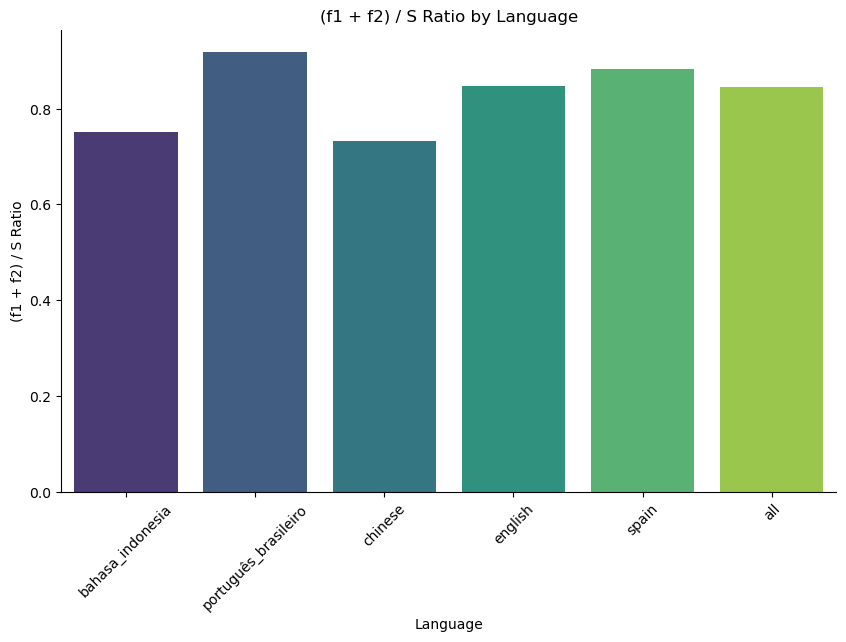

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建数据
data = {
    'language': ['bahasa_indonesia', 'português_brasileiro', 'chinese', 'english', 'spain', 'all'],
    'f1': [787, 458, 504, 21462, 1706, 24917],
    'f2': [263, 83, 145, 6273, 401, 7165],
    'S': [1398, 589, 885, 32731, 2389, 37992],
    'n': [3505, 871, 2371, 54772, 3759, 65278]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 计算(f1 + f2) / S的比例
df['ratio'] = (df['f1'] + df['f2']) / df['S']

# 输出结果检查
print(df[['language', 'f1', 'f2', 'S', 'ratio']])

# 使用Seaborn和Matplotlib绘制图表
plt.figure(figsize=(10, 6))
sns.barplot(x='language', y='ratio', data=df, palette="viridis")
plt.xlabel('Language')
plt.ylabel('(f1 + f2) / S Ratio')
plt.title('(f1 + f2) / S Ratio by Language')
plt.xticks(rotation=45)
plt.show()


In [14]:
dfs = []
for lang, df in lits.items():
    df['username'] = [t+'_'+lang for t in df['username']]
    dfs.append(df)
    
df_all = pd.concat(dfs, ignore_index=True)
df_all

username          language   work_id
0       dianthus_peony_bahasa_indonesia  Bahasa Indonesia  36657928
1            Reyan3779_bahasa_indonesia  Bahasa Indonesia  36657928
2           CuddlyWorm_bahasa_indonesia  Bahasa Indonesia  36657928
3      jinkook_married_bahasa_indonesia  Bahasa Indonesia  36657928
4          agustDRkive_bahasa_indonesia  Bahasa Indonesia  36657928
...                                 ...               ...       ...
65273                   nakatae95_spain             spain  36790954
65274                     cxnthcr_spain             spain  39783810
65275                  owennshome_spain             spain  39783810
65276                   ch3rrykoo_spain             spain  39783810
65277         Suchabeautifulangel_spain             spain  39783810

[65278 rows x 3 columns]

In [15]:
abundance = u.to_abundance(df_all['username'])

In [16]:
try:
    os.mkdir('../outputs')
except FileExistsError:
    pass

In [17]:
print('original # works:', diversity(abundance, method='chao1'))
print('original # documents:', diversity(abundance, method='minsample'))

original # works: 81317.00893462854
original # documents: 1660321.4138434138


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.70294950855896 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


In [18]:
wsurvival_all = survival_ratio(abundance, method='chao1', n_iter=10000)

100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1143.82it/s]


In [19]:
%run /Users/josiechen/desktop/copia/plot.py

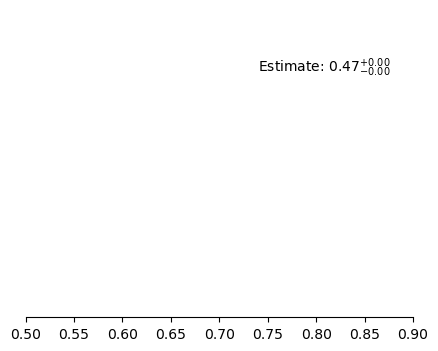

In [20]:
ax = density_plot(wsurvival_all, figsize=(5, 4), xlim=(0.5, 0.9))
ax.set_yticklabels([])
ax.tick_params(axis='y', which='both', left=False)
ax.set_ylabel(None)
ax.spines['left'].set_visible(False)

In [21]:
dsurvival_all = survival_ratio(abundance, method='minsample', n_iter=10000)

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.70294950855896 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.001976563828066 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                       | 1/10000 [00:01<4:46:59,  1.72s/it]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.385503294412047 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.700222110492177 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserW

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.833389110281132 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|▏                                       | 41/10000 [00:02<04:16, 38.80it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.962226234027185 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.433160150889307 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.26683393807616 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.719160903710872 > 0.1
  warnings.warn(f

  1%|▎                                       | 82/10000 [00:02<02:14, 73.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.31652383087203 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.132152970181778 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.537972954800352 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.29679408913944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.639756428310648 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.259674028959125 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  2%|▋                                      | 165/10000 [00:03<01:40, 97.44it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.84294903697446 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.120161146041937 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.831622247584164 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.396372169954702 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.782029855879955 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  2%|▊                                      | 206/10000 [00:03<01:39, 98.85it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.34310882189311 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.93770510016475 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.981439781142399 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.653806895250455 > 0.1
  warnings.warn(f

  2%|▉                                      | 246/10000 [00:04<01:42, 95.28it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.423921349225566 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.543990991194732 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.2829654031666 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.468522328417748 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.47519120236393 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.511829522205517 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.414415197446942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.573020428651944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.398315169266425 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.033169551403262 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.644102326245047 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.707386104972102 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.4289197392063215 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.410400506807491 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.9625673370901495 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.187550764414482 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.326962256571278 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.821029324899428 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.610146799357608 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.181589536368847 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.510354922153056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  4%|█▋                                     | 417/10000 [00:06<01:45, 90.90it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.013751155813225 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.620560011593625 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.415074127842672 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.26703206798993 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.154708437388763 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  5%|█▊                                     | 458/10000 [00:06<01:42, 92.70it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.641710193129256 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.345955366501585 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.1407957021147 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.964978520409204 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.009919153526425 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.00340094580315 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.518604704062454 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.419541243813 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.151741844252683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  5%|█▉            

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.627234068815596 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.168753609759733 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.192380137741566 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.03168623999227 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.619321343139745 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  5%|██▏         

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.549615140771493 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  6%|██▎                                    | 583/10000 [00:08<01:49, 86.05it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.157755550695583 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.957969979848713 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3531830984866247 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.091561203589663 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.16081438830588 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.083815916674212 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.927182040759362 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.721784006222151 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3099727551452816 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.929880069103092 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.200524030486122 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.675275499583222 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.758251360850409 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.902135847369209 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.445991642423905 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.387003200827166 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.194769053370692 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.547807443072088 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.734922137809917 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.0748611073941 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  7%|██▉                                    | 749/10000 [00:10<01:46, 86.82it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.938308119541034 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.02064081467688 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.75280268373899 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.257743853260763 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.357529186527245 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.59191515133716 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.88929259625729 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.7661648214561865 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.897636208101176 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  8%|███          

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.7010582422371954 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.172076541814022 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  9%|███▍                                   | 872/10000 [00:11<01:52, 81.08it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.403910941793583 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.516329551814124 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.86541562480852 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.8624349978053942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.654824238619767 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.222297055646777 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.2002213367959484 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.733950368710794 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.253949219710194 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.77332006150391 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.40342047100421 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.74650765489787 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|███▋                                   | 957/10000 [00:12<01:42, 88.38it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.6439507842296734 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.033808338455856 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.914724747184664 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.633630703436211 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.925616177963093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.160766729619354 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|███▉        

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.253106185933575 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.8798597533022985 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.933812262956053 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.504232697887346 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.623508161399513 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

 12%|████▍                                 | 1161/10000 [00:15<01:43, 85.67it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.483905703411438 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.496057809796184 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.652841562521644 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.791611484601162 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3196869653183967 > 0.1
  warnings.warn

 12%|████▍                                | 1204/10000 [00:15<01:27, 100.49it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.162423850619234 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.115827067871578 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.773693482973613 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.053599672857672 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1844248437555507 > 0.1
  warnings.warn(

 12%|████▋                                 | 1246/10000 [00:15<01:33, 93.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.1277830140898 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6682083290070295 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.083313197595999 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.003005175036378 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3691658996976912 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.621342543396167 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.939690239960328 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.910654975101352 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.176664645550773 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 13%|████▉                                 | 1292/10000 [00:16<01:46, 81.73it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.869554280652665 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.90637247124687 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.58417262067087 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.88156510272529 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.67437097604852 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 14%|█████▏                                | 1373/10000 [00:17<01:51, 77.06it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.897499146987684 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.158309213118628 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.202906226506457 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.9866864865180105 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.325049632345326 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.654652082012035 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.348468978889287 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.163169289473444 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.97217704798095 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.632532127550803 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.205682693747804 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.553887586458586 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.930835967534222 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.798820171621628 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6255297706229612 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 15%|█████▋                                | 1497/10000 [00:18<01:30, 94.41it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0691288949456066 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.745942379697226 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.568958554649726 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 15%|█████▊                                | 1538/10000 [00:19<01:27, 96.44it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.001286931568757 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.025779865216464 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.268025607219897 > 0.1
  warnings.warn(f"

 16%|██████▏                               | 1617/10000 [00:20<01:27, 95.66it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.604135349043645 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.67739618977066 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.073324580909684 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.529855891712941 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.863725721370429 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.01264618197456 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.526680177077651 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.654619006207213 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.34575018438045 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6287552545545623 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.911860700463876 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 17%|██████▍                               | 1701/10000 [00:21<01:40, 82.28it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.365840598475188 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.730014919769019 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.501179062994197 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.990386338322423 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.658504237420857 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.268637449131347 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.856008060625754 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.60635667690076 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.981595427845605 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

 18%|██████▊                               | 1785/10000 [00:22<01:39, 82.38it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.434175381902605 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.58383054798469 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.431309866369702 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6560704252915457 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.09454611944966 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.12339087529108 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 18%|██████▉                               | 1828/10000 [00:22<01:44, 78.30it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.480203880695626 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.593012936529703 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.255215202225372 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.553222781396471 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.35266969387885183 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 19%|███████                               | 1872/10000 [00:23<01:36, 84.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.284566498477943 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.475111149251461 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.11942498909775 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.003809638903476 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.56984857900534 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8938596870284528 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.79772314406 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.155257489881478 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 19%|███████▎                              | 1915/10000 [00:23<01:51, 72.75it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.87982979719527 > 0.1
  warnings.warn(f"Tol

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.25206529640127 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.07483810267877 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.136768514406867 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3807612080127 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.59014613169711 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desk

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.026745421113446 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.191496614716016 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.93673935730476 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 20%|███████▊                              | 2041/10000 [00:25<01:34, 84.41it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.646990068024024 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.469855578499846 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.235334068187512 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.86078550631646 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0731612255331129 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.97401655104477 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.998620995203964 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 21%|███████▉     

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.146704590530135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 21%|████████                              | 2123/10000 [00:26<01:35, 82.25it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.884498408646323 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.91405803663656 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.206268965033814 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.091017833678052 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.417134965304285 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.529198719654232 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.793448606622405 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.09980169730261 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.715916499029845 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.332308087381534 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 22%|████████▌                             | 2247/10000 [00:27<01:39, 77.96it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.309605324524455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.883830395760015 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.128840538673103 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.66941743553616 > 0.1
  warnings.warn(

 23%|████████▋                             | 2288/10000 [00:28<01:37, 78.72it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.869154944783077 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.7276331622852 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.63155496737454 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.816612021415494 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.505030014552176 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.026587758678943 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 23%|████████▊                             | 2330/10000 [00:29<01:36, 79.73it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.248618604731746 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6665299845626578 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.24421485257335 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.275998911471106 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.905095894820988 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.115295235533267 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.608365929918364 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5021534574916586 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 24%|█████████                             | 2373/10000 [00:29<01:34, 81.03it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.192340189940296 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.76351980085019 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.10750669008121 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.49163986579515 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 25%|█████████▎                            | 2452/10000 [00:30<01:42, 73.98it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.54580317402724 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.97570047096815 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.939410976599902 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.48737229721155 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.320384496008046 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.979870693176053 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.9434818781446666 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 25%|█████████▍ 

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.49641863524448 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.205355347483419 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.369690263760276 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.10942198219709 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 25%|█████████▋                            | 2536/10000 [00:31<01:46, 70.34it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.83139648695942 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.898960844380781 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 26%|█████████▊                            | 2576/10000 [00:32<01:44, 70.99it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.214857089915313 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.843920620973222 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.898365442408249 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.279580794624053 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.331700759124942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.1159595703938976 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.03921391547192 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.727574619813822 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.810440338216722 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.428321167943068 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.026944374199957 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.448883410776034 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.2136986802797765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 27%|██████████▎                           | 2701/10000 [00:34<01:56, 62.53it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.022868099506013 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.547255147015676 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.343986197258346 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.66179118352011 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.4058053009212 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.211325248819776 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 27%|██████████▍  

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4004237037152052 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.199658223544247 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.130532857612707 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 28%|██████████▌                           | 2784/10000 [00:35<01:36, 74.45it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.081234001321718 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.157213691971265 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.5669890847057104 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.410443334607407 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.255274283932522 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.993354069418274 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.780885767773725 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.104084528051317 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 29%|██████████▉                           | 2866/10000 [00:36<01:26, 82.19it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.3704513219418 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.789931439911015 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.465159595478326 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.748215701198205 > 0.1
  warnings.warn(f"T

 29%|███████████                           | 2909/10000 [00:36<01:32, 76.89it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4674544159788638 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.521109518711455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.921229817904532 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.128700073226355 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.83691876078956 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.292438071453944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.902172911679372 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 30%|███████████▏                          | 2954/10000 [00:37<01:24, 83.65it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.026184276212007 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.775493202614598 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.610142583260313 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.159100471297279 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.588939735898748 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.17422758450266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 30%|███████████▍                          | 2999/10000 [00:38<01:26, 81.12it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.791225548135117 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.341755430446938 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.423019284848124 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8023543071467429 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2874486696673557 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.628932710038498 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.239102271269076 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

 31%|███████████▋                          | 3079/10000 [00:39<01:27, 79.27it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.346672195591964 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.218221386545338 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.850633664755151 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.81120196718257 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.056312268134207 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.58487644547131 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 31%|███████████▊                          | 3122/10000 [00:39<01:25, 80.40it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.12373503309209 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5468052159994841 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.74148660816718 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.181635277345777 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.645347206504084 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.244948569568805 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.535446320893243 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.5174539666622877 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.7240836849669 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.9767402904108167 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.418795462348498 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.238347088103183 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22815067484043539 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.000528768170625 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.534035967546515 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.869679546914995 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.148921893560328 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.478123011533171 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.25513686577324 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.40293713461142 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.451608133967966 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.710687671322376 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.01791677926667 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.65355257387273 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2268574355402961 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.921277458430268 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.84324021381326 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.130873066489585 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.465125833754428 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.7110524836462 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.097301627043635 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.398475239053369 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.961456961813383 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 34%|████████████▊                         | 3380/10000 [00:42<01:12, 91.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.642797187785618 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.400994742289186 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.70679731015116 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 34%|████████████▉                         | 3420/10000 [00:42<01:12, 90.24it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.767996976384893 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.145408903830685 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.824344214517623 > 0.1
  warnings.warn(f

 35%|█████████████▏                        | 3460/10000 [00:43<01:09, 94.44it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3917286783689633 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.30152823217213 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.967633473686874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.148192647844553 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.179615871049464 > 0.1
  warnings.warn(f"T

 35%|█████████████▍                        | 3544/10000 [00:44<01:05, 98.29it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.130034817615524 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.724254711763933 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.30752891546581 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.815132573596202 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.180926277767867 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.0705878767184913 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 36%|█████████████▋                        | 3587/10000 [00:44<01:04, 98.86it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.003865014063194 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.1116650988114998 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.884000665857457 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.394897480495274 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.493661809246987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 37%|█████████████▉                        | 3672/10000 [00:45<01:03, 99.29it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.433084147283807 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.571495570242405 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.4303794313455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.2086642725626 > 0.1
  warnings.warn(f"T

 37%|██████████████                        | 3712/10000 [00:45<01:04, 97.29it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.34250220132526 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.281685604597442 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.030729314079508 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.586582250194624 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.08762343856506 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.141135256155394 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.203034354490228 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.68094119534362 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.460354574024677 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.80426641460508 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.728890991886146 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.666113252285868 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5839960047742352 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.551991547923535 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.681389128090814 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 38%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.635300161200576 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.532952606794424 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 39%|██████████████▊                       | 3883/10000 [00:47<01:09, 88.40it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.581300113233738 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.06352585100103 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.0885138338198885 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.36968166322913 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 39%|██████████████▉                       | 3923/10000 [00:47<01:07, 90.65it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.16051222954411 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.96909202018287 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.795808909460902 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.722239281632937 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.68179717566818 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 40%|███████████████                       | 3964/10000 [00:48<01:04, 93.62it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.27718761446885765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.496950419154018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.85577415523585 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.93554839794524 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.842498952290043 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.53930104430765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.24111734807957 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.4482595628360286 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.635015072417445 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.36861981684342 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 40%|██████████████▉                      | 4048/10000 [00:49<00:58, 101.68it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.93723076255992 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.78926510270685 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.501151246135123 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3670048102503642 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.862392534851097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 41%|███████████████▏                     | 4092/10000 [00:49<00:56, 104.04it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.707918993080966 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.390212919097394 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.997542757773772 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.882388743222691 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.844121288857423 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.776384468888864 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.17070259898901 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.275223948177882 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 41%|███████████████▎                     | 4136/10000 [00:50<00:55, 105.62it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.895069996826351 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.748781471862458 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.024691313505173 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 42%|███████████████▍                     | 4180/10000 [00:50<00:57, 101.56it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.759542153100483 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.214409988722764 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.300957603612915 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.345558655331843 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.819038865040056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.4325085683958605 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.957726312219165 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.732039542286657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 43%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3411286156624556 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.895715297432616 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 43%|████████████████▎                     | 4308/10000 [00:52<01:00, 94.85it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.0838766067754477 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.880304353660904 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.099630028242245 > 0.1
  warnings.warn(

 43%|████████████████▌                     | 4349/10000 [00:52<01:00, 92.82it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.209986072150059 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.233451524516568 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.83055581781082 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.341273510362953 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.079811008181423 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.155930766253732 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.403595214360394 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.07761600241065 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.682123773382045 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.88692868547514 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.976948581286706 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.389751646551304 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.283091417630203 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.288149219588377 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.674349924782291 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.306037983158603 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.64855324162636 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 45%|█████████████████                     | 4479/10000 [00:53<00:56, 97.03it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.371240706299432 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.00963259965647 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.356361588346772 > 0.1
  warnings.warn(f"

 45%|█████████████████▏                    | 4520/10000 [00:54<00:57, 96.08it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.850530492840335 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.533140628947876 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.49429677356966 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.793812373653054 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.01749396789819 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.114243694464676 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.99906166200526 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.78290295554325 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.638136843801476 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.40729826653842 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.28617494215723 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 46%|█████████████████▌                    | 4606/10000 [00:55<01:08, 78.94it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.757595214177854 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.97890302806627 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.650016248458996 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.914099927060306 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.592611847794615 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.749808950349689 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.978923061396927 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.584567336016335 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 47%|█████████████████▋                    | 4652/10000 [00:55<01:01, 87.60it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.50520152412355 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.040765228564851 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.800367840914987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6997656206367537 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.793472421937622 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.183297160663642 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.669197067851201 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.780096275149845 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5031854960834607 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.394799648900516 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.01476288086269 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 47%|█████████████

 48%|██████████████████▏                   | 4776/10000 [00:57<00:57, 91.29it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.7454067766666412 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.208657684619538 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.626693627680652 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.67867103079334 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.632561285980046 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.59232982667163 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.495823687524535 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.21728515974246 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.864076714613475 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 48%|██████████████████▎                   | 4824/10000 [00:57<00:59, 87.02it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.977202369598672 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.640235845930874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.693143399083056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.798306118813343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0893778337631375 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.05467109242454 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.213018957409076 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.664294158690609 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3127402036916465 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 49%|██████████████████▋                   | 4911/10000 [00:58<00:55, 91.65it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.770772563642822 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.164394068531692 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.388115548412316 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.281121186446398 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.783632466918789 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.210911098518409 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.508916991529986 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.69765028555412 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.858501778915524 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3156322868308052 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.461310733808205 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.191152670187876 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

 50%|███████████████████▏                  | 5038/10000 [01:00<00:59, 83.04it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.477198523120023 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.7232345095835626 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9958924581296742 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.9819171045674 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.20054006052669 > 0.1
  warnings.warn(f"

 51%|███████████████████▎                  | 5082/10000 [01:00<01:04, 76.06it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.319526882027276 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.97004703967832 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.40163447498344 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.20597715245094 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.249153654905967 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.32529151381459 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.647909631836228 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.451029504532926 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 51%|███████████████████▍                  | 5128/10000 [01:01<01:01, 79.67it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.340472521609627 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.22678715805523 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.14736042462755 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.363704031100497 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.55642477667425 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.749414375401102 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.186975864111446 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.728121825843118 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 52%|███████████████████▊                  | 5214/10000 [01:02<00:56, 84.02it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.805421769386157 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.71330967952963 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.098126691998914 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.379871673882008 > 0.1
  warnings.warn(

 53%|███████████████████▌                 | 5298/10000 [01:03<00:46, 100.27it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.582665478112176 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.106023339671083 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.071213849587366 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.019347322406247 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6623531453078613 > 0.1
  warnings.warn(

 53%|███████████████████▊                 | 5342/10000 [01:03<00:46, 100.37it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.211121432250366 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10899798478931189 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.341905320994556 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.0288525762734935 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.404650232871063 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.626858551055193 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.891769150504842 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.759327855310403 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.931589557789266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.32337680947967 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0598699807887897 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.675737586803734 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.62553495413158 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.184062435640953 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.526853771298192 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.557519516325556 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.375263880006969 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.357817994547077 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.176426069578156 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.044241377268918 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 55%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.327471344266087 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.301361926016398 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.772079359390773 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 56%|████████████████████▌                | 5563/10000 [01:05<00:43, 101.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.24451511434745 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.125779784284532 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.875601267558523 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 56%|█████████████████████▎                | 5605/10000 [01:06<00:46, 94.37it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.90000204439275 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.390230815624818 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.000345725915395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.324101369362324 > 0.1
  warnings.warn(

 56%|█████████████████████▍                | 5646/10000 [01:06<00:48, 89.86it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.74312791484408 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.557927543995902 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.430475506582297 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.93233980133664 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.36503286578227 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.19903514708858 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.309255316038616 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.5973400430521 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8125624054810032 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.500069973408245 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.143958893604577 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.400976266944781 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.544568134471774 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.553330991300754 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.443047009641305 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.66067529306747 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.122191090718843 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.06756184331607 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.95361999317538 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.8956392275868 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Deskt

 58%|██████████████████████                | 5820/10000 [01:08<00:53, 78.87it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.327405225019902 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.344175625010394 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.213813116657548 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.799665077123791 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.298372573917732 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.377608213457279 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 59%|██████████████████████▎               | 5865/10000 [01:09<00:48, 86.01it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.920370704843663 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.325954132829793 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.186807416845113 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.841210004058667 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.706761750974692 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.493844773969613 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.422107506194152 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.480330873513594 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 59%|██████████████████████▍               | 5911/10000 [01:09<00:46, 88.23it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.4913749510888 > 0.1
  warnings.warn(f"Tol

 60%|██████████████████████▌               | 5950/10000 [01:10<00:44, 91.73it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.731858965358697 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.625071978196502 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.441923491191119 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.65872699674219 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4322252906858921 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.03493199578952 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.779271838837303 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.19176004291512 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.487030996358953 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.198841515928507 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 60%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.648979709367268 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.27657306578476 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.001881227944978 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 60%|██████████████████████▉               | 6039/10000 [01:11<00:46, 84.76it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5578210013918579 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.931406480493024 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.918012606562115 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 61%|███████████████████████               | 6078/10000 [01:11<00:45, 86.08it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.185330696986057 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.591455074260011 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.799740937072784 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.901529875351116 > 0.1
  warnings.warn(f

 61%|███████████████████████▎              | 6121/10000 [01:12<00:52, 74.09it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.369254462770186 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.765877530910075 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.490150579949841 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4262587581761181 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.113233804004267 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.471784141263925 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.496268927818164 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.851235224166885 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 62%|███████████████████████▍              | 6166/10000 [01:12<00:47, 81.45it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9194760273676366 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.213983870460652 > 0.1
  warnings.warn(

 62%|███████████████████████▌              | 6209/10000 [01:13<00:49, 76.19it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.126182075822726 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.174587832181714 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.19582170585636 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.248518261010759 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.20906657865271 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.701853908598423 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.265984373982064 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.6205107242567465 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.539579375996254 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 63%|███████████████████████▊              | 6257/10000 [01:14<00:51, 72.93it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.135433109127916 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.35357351624406874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.621748114121147 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.41272336698603 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 63%|███████████████████████▉              | 6299/10000 [01:14<00:49, 74.67it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.361803509411402 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.42487473820802 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.866996113560162 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.275584512506612 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.172259093611501 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.732661646325141 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.685742795700207 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.638421821640804 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.136959331226535 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.615136409527622 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.406666617258452 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 64%|████████████████████████▎             | 6388/10000 [01:15<00:46, 77.62it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.169374693417922 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6869293277850375 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.686269619851373 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.563962460146286 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.740089308703318 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.141657197265886 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 64%|███████████

 65%|████████████████████████▌             | 6471/10000 [01:16<00:42, 82.90it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.196555527159944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6245663042645901 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.662230005953461 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.532205859548412 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.319717423757538 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.051861397805624 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.8574030695017427 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.40663960110396147 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.111880465759896 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.68968093150761 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 65%|██████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.496059492114 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2631074304226786 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.312004510313272 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.359240401652642 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.602476310450584 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.44777783274185 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.67088939831592 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.029371154611 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.273616304737516 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 66%|█████████████████████████▏            | 6642/10000 [01:18<00:36, 92.01it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.569683878449723 > 0.1
  warnings.warn(f"Tol

 67%|█████████████████████████▍            | 6684/10000 [01:19<00:37, 88.34it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.987027838942595 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.330646061571315 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.172693019732833 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.298783439560793 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.318003136315383 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.247502406593412 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.07043063105084 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.27976662677247 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2878163948189467 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.897273832932115 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 67%|██████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.395261997007765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.058514806907624 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.44434364384506 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.873200848815031 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 68%|█████████████████████████▋            | 6776/10000 [01:20<00:33, 96.42it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.913133293041028 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.603040848276578 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 68%|█████████████████████████▉            | 6817/10000 [01:20<00:32, 97.90it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.448816612130031 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.108781491289847 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.893509545130655 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.30696007143706 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6815717471763492 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.094500009552576 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.28276444785297 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.4637641167500988 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.250093975686468 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.212188589503057 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.235812088823877 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.72555244434625 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.85399572213646 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.074319619801827 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.724743960541673 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.104302435182035 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.080578981083818 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 70%|█████████████████████████▉           | 7002/10000 [01:22<00:28, 105.06it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.83096807426773 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.32088056881912 > 0.1
  warnings.warn(f"T

 70%|██████████████████████████           | 7046/10000 [01:22<00:29, 101.39it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.749843792291358 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.302904188982211 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.605032048653811 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21998799790162593 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.486633571446873 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.976972107891925 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.181809419882484 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 71%|██████████████████████████▏          | 7090/10000 [01:23<00:28, 102.65it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.597258597728796 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.886138392845169 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.877186854952015 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.4873153663938865 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.651581976911984 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.08833595586475 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 71%|███████████████████████████           | 7132/10000 [01:23<00:31, 90.16it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.439540377585217 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.913377182092518 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.885494212736376 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.27727369160857 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.189524047775194 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.96272643795237 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 72%|███████████████████████████▍          | 7217/10000 [01:24<00:30, 90.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.005252810777165 > 0.1
  warnings.warn(f"

 73%|███████████████████████████▌          | 7259/10000 [01:25<00:27, 98.40it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.298547649057582 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.8120973079931 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.79674084088765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.520662906812504 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.0680734257912263 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.794635213795118 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.704955288092606 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.262705040629953 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 73%|███████████████████████████          | 7303/10000 [01:25<00:26, 100.79it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.099960619350895 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.039240142912604 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.301979142590426 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 73%|███████████████████████████▉          | 7346/10000 [01:26<00:27, 95.09it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.028576772776432 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.300813438603655 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.970223249169067 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.84763485135045 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.562469897675328 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.81411556119565 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.34846192144323 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.074021781329066 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.89567835140042 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.448913472588174 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.424580994760618 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.775617867941037 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.206210064119659 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.69165416364558 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 75%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.70258229924366 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.909211622667499 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.860379885765724 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.559561919188127 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.497651274665259 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.493346677278168 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.882694940897636 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.543602765421383 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.3527302091242746 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.678043181076646 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.152688739355654 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.673698086407967 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.538514260784723 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.547498146421276 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.076920615159906 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

 76%|█████████████████████████████         | 7650/10000 [01:29<00:24, 94.87it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.479525308473967 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.219341942109168 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.741830151062459 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.459195933537558 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.205913857440464 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.4436126705259085 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.906820932403207 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.866503239725716 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.331359793548472 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.287443886860274 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.439631397370249 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.563502340111881 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.561152113368735 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.39086984761525 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.027752875699662 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 77%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.8765109025407583 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.5370530259097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 78%|█████████████████████████████▌        | 7783/10000 [01:30<00:24, 90.06it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.887309096753597 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.914274561102502 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.015288450405933 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.287059440743178 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.38339887803886 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.221562831429765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.33506819489412 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.832166513311677 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.090269397827797 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 79%|██████████████████████████████        | 7913/10000 [01:32<00:22, 93.96it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.048765604849905 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.14662032178603 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.676132489810698 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5592301704455167 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.292032422847115 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.408100546337664 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.45198730379343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 80%|██████████████████████████████▎       | 7963/10000 [01:32<00:21, 95.12it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.947503262665123 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.627152264933102 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.26638296584133 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 80%|██████████████████████████████▍       | 8005/10000 [01:33<00:20, 97.76it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.988476413069293 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.47534683009144 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.462297401507385 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.539379821857437 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.169327138573863 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.80629026342649 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.019238654058427 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.267338973004371 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.61249615577981 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.34658205206505954 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.929837234318256 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.677928125252947 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.180571730597876 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.051121326861903 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|█████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.053882499458268 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.7860231337836 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.154922588379122 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|██████████████████████████████▉       | 8142/10000 [01:34<00:19, 93.76it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.474705911241472 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.894375173957087 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.764014850487001 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.24366559763439 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.257640380761586 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.536510275444016 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.382497071987018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.13051058270503 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.265690755099058 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.829872876754962 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.655920997145586 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.48338060709648 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.142287031165324 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.946426491835155 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.701053402153775 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 83%|██████████████████████████████▋      | 8282/10000 [01:36<00:17, 100.79it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.3966166570317 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.274214705452323 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.07671912398655 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.561100621824153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.266833453322761 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.56847482349258 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.116284598130733 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1311543751507998 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.80446400202345 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.639706143643707 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.101295957691036 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.81415905058384 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.547263213898987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.909163531847298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 84%|███████████████████████████████▏     | 8420/10000 [01:37<00:15, 102.67it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.991718942881562 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.745929228607565 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.758175215800293 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.263343829312362 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.310338411130942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.57858059380669 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.146921381936409 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.933458758634515 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 85%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.058476394042373 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.558695432846434 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.79027087695431 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 85%|███████████████████████████████▌     | 8519/10000 [01:38<00:14, 102.93it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.16021830693353 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.120139217819087 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.660268476000056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.410985168651678 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 86%|███████████████████████████████▋     | 8563/10000 [01:38<00:13, 104.77it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.8905698113376275 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.195785469259135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.175612197024748 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.726703876047395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 86%|███████████████████████████████▊     | 8607/10000 [01:39<00:13, 102.44it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.757254504249431 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.796203791862354 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.49035408149939 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.391279894160107 > 0.1
  warnings.warn(f

 87%|████████████████████████████████     | 8651/10000 [01:39<00:13, 102.50it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.472822958021425 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.84900488005951 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.246911637019366 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.532032977440394 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.087286612135358 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2371584235224873 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.996432166430168 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.532774852239527 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.07008226949256 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.59635769855231 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.47031854186207 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9347489196807146 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.297268856316805 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.551179605536163 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.279936222592369 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.083599537727423 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.536086335079744 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.296216936549172 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.622701844433323 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.360558683169074 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 88%|██████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.089542094618082 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.1693821649532765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.357289990293793 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.600917399395257 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.326035644160584 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 88%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.947109436732717 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.875308126793243 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6763689835788682 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.455971849383786 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 89%|████████████████████████████████▊    | 8881/10000 [01:41<00:11, 100.15it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.45808703219518065 > 0.1
  warnings.warn

 89%|█████████████████████████████████▉    | 8922/10000 [01:42<00:11, 91.65it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3135796466376632 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.072126131039113 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3560834638774395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.965021944139153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.46867105376441 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.917289008037187 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.340007666964084 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.261587513028644 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.499127294286154 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.833368578576483 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.459861497976817 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6985387575114146 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 90%|██████████████████████████████████▏   | 9012/10000 [01:43<00:10, 91.44it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.175524650607258 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.041067849495448 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.80028298869729 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11438744061160833 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.4088022001087666 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.972819159505889 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.249486074084416 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.68417661206331 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.23559716111049 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.19351524254307 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.03011006314773 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.240123769035563 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.556844735168852 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 91%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4279257749440148 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 91%|██████████████████████████████████▊   | 9148/10000 [01:44<00:10, 84.58it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.412989308242686 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.28050740773324 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.533394027268514 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.955741063924506 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.193502456881106 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 92%|██████████████████████████████████▉   | 9194/10000 [01:45<00:09, 83.71it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.0298935772152618 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.194145342684351 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.28181910875719 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.13948730006814 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.526468318188563 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.376457522041164 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.490963678224944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.731944867875427 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.021039109095 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.7824857608648 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 93%|███████████████████████████████████▎  | 9281/10000 [01:46<00:08, 81.50it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.54200690507423 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.767716796137393 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.231117882882245 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1539748376235366 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.857277763774619 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.7034960265737027 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.6296680647647 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.488109026104212 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.5653144067619 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 93%|███████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.46592708316166 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4422623928403482 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.741973400698043 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 94%|███████████████████████████████████▌  | 9370/10000 [01:47<00:06, 91.31it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.927066519623622 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.598855876363814 > 0.1
  warnings.warn(f"

 94%|███████████████████████████████████▊  | 9410/10000 [01:47<00:06, 93.51it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.335574134020135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.078133756411262 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.577723453752697 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.021344291861169 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.19004010874778 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.275619095074944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.96250121772755 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.831447811797261 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.579980946262367 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0815168790286407 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.00755281036254 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.096967153367586 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.944699950166978 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.470409223227762 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.911980150034651 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 95%|█████████████

 95%|███████████████████████████████████▎ | 9546/10000 [01:49<00:04, 102.83it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.9814585839631036 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.430263652233407 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.344220545841381 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.0553909400478 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.622081839712337 > 0.1
  warnings.warn(f"

 96%|███████████████████████████████████▍ | 9590/10000 [01:49<00:04, 100.11it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.281123297754675 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.157402380835265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.794485899852589 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.470022616209462 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.962187709170394 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.439940150477923 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.3927198325982317 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.566066366620362 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.489751182496548 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.5820464621065184 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.5587228089571 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3990487214177847 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.440649912692606 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.767009344999678 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.584942687535658 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 97%|██████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.988975226529874 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.841811425983906 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 98%|█████████████████████████████████████▏| 9775/10000 [01:51<00:02, 89.20it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.086159317754209 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.399138296255842 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.83026460604742 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.663059263839386 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.381082894164138 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.2801598389633 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.395946155418642 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 98%|█████████████████████████████████████▎| 9825/10000 [01:52<00:01, 92.44it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.0791051858104765 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.22389060340356 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.42350622662343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.433109672623686 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.343392494600266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.939496785402298 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.934164066798985 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.326790203922428 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.180625729379244 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.029118384001777 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
100%|█████████████████████████████████████▊| 9955/10000 [01:53<00:00, 96.12it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.5163743384182453 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.22447168023791 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.387389873503707 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.671212889719754 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
100%|█████████████████████████████████████▉| 9997/10000 [01:54<00:00, 99.59it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.342114167404361 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.452468938427046 > 0.1
  warnings.warn(

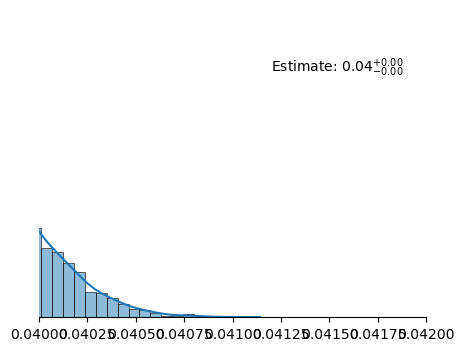

In [22]:
ax = density_plot(dsurvival_all, figsize=(5, 4), xlim=(0.04, 0.042))
ax.set_yticklabels([])
ax.tick_params(axis='y', which='both', left=False)
ax.set_ylabel(None)
ax.spines['left'].set_visible(False)


In [23]:
minsample_est = diversity(abundance, method='minsample', 
                          solver='fsolve', CI=True, n_iter=10000)

/Users/josiechen/Desktop/copia/estimators.py:535: RuntimeWarning: overflow encountered in exp
  v = lambda x: np.exp(x * (2 * f2 / f1))
/Users/josiechen/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/josiechen/Desktop/copia/estimators.py:548: UserWarning: Tolerance criterion not met via fsolve: inf > 0.1-> backing off to grid-solver.
  warnings.warn(msg)
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.70294950855896 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


Diff_intersect: inf


  0%|                                                 | 0/10000 [00:00<?, ?it/s]/Users/josiechen/Desktop/copia/estimators.py:535: RuntimeWarning: overflow encountered in exp
  v = lambda x: np.exp(x * (2 * f2 / f1))
/Users/josiechen/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/josiechen/Desktop/copia/estimators.py:548: UserWarning: Tolerance criterion not met via fsolve: inf > 0.1-> backing off to grid-solver.
  warnings.warn(msg)
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.337481472059153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                       | 1/10000 [00:02<6:36:23,  2.38s/it]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8

  0%|▏                                       | 37/10000 [00:02<05:48, 28.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.26951258815825 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.289735674625263 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.478325066156685 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.422272728872485 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.482009812258184 > 0.1
  warnings.warn(f

  1%|▍                                      | 118/10000 [00:03<01:52, 87.46it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.562548238085583 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.99738682678435 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.104509122669697 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.338775100768544 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.165301086497493 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.91212835116312 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.29984709585551 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.100635474547744 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.06381332699675 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3382174618309364 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.514159577200189 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.64352027559653 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.286455171066336 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.45956231339369 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  2%|▊                                      | 209/10000 [00:04<01:46, 91.54it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.255611763335764 > 0.1
  warnings.warn(f"

  2%|▉                                      | 247/10000 [00:05<02:09, 75.58it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.1927510793320835 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2057465239195153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.565116108744405 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.062961977208033 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.31514916010201 > 0.1
  warnings.warn(

  3%|█                                      | 288/10000 [00:05<02:04, 78.02it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.463613524101675 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.697581121814437 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.216638076584786 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.3982813997427 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2194310828344896 > 0.1
  warnings.warn(f"T

  4%|█▍                                     | 369/10000 [00:06<01:45, 91.39it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.977202369598672 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.075104489806108 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.604768570279703 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.921727872570045 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.9422265724279 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5887284210184589 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.852835915866308 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.09600362891797 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.326675914111547 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.962461778544821 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.737753371940926 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.31168448110111 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.118930737604387 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.584106966853142 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.084108992712572 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.79712896759156 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  5%|█▉                                     | 493/10000 [00:08<01:51, 84.95it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.742410464561544 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.081912783323787 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.2293579273391515 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.46075684565585 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.478031043545343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.35046157380566 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.7056168402778 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.736951221129857 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.45604348089546 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desk

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.934344652458094 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  6%|██▏                                    | 576/10000 [00:08<01:49, 85.74it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.887499008094892 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.873962671728805 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.585591471288353 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.927678957930766 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.646217819536105 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.844121288857423 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.896158297429793 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.381155729992315 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.234233780880459 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6554811446694657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.534400592674501 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.3265968314372 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.043153874925338 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  7%|██▌                                    | 661/10000 [00:09<01:44, 89.66it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.62757411878556 > 0.1
  warnings.warn(f"To

  7%|██▋                                    | 701/10000 [00:10<01:40, 92.14it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.976982908206992 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.006249860627577 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.846937576308846 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.392125166603364 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.72821781260427 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.984659150824882 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.46397847519256 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.175676835817285 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.862781452131458 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.09057904628571 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.95428078889381 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.177961663343012 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.72045390063431 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.4635482067242265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.54386963858269 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  8%|███▏         

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.730908545549028 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.638557354803197 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24206691596191376 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.92458685382735 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  9%|███▍                                   | 871/10000 [00:12<01:37, 93.74it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.497118101804517 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.259639212395996 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.81299448525533 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.169722503400408 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.93211581115611 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  9%|███▌                                   | 912/10000 [00:12<01:32, 98.01it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9055991016793996 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.144083427614532 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.0648194004315883 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.46437034662813 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.438326260773465 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|███▋                                   | 955/10000 [00:13<01:35, 95.08it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.60766302619595 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9761950292158872 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.315665820147842 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.084496666444466 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|███▉                                   | 997/10000 [00:13<01:31, 98.12it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.498328077374026 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.005105105810799 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.697083462611772 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.42271140217781 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.899752222001553 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.157171288505197 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.513743117102422 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|███▊        

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.118900424218737 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.322708846651949 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.229858437436633 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.42524679773487 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.689465098432265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.247601104550995 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.025596304098144 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.032723999698646 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.44242638326250017 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.989233933156356 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.828060324536636 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.802373921964318 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.35308806877583265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.928081514313817 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.146474292036146 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 12%|████▍    

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8282866161316633 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 12%|████▌                                 | 1205/10000 [00:15<01:34, 92.86it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.375244625261985 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.475944570498541 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.1518758215243 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.859513957169838 > 0.1
  warnings.warn(f"

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.539343058364466 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.297258532838896 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.56235153367743 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.856779501773417 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.950144826434553 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.783798189018853 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.867671428946778 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.471289778361097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.788175457157195 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.808187387767248 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.480843861936592 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2028000820428133 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.297563472413458 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.579254380776547 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 13%|█████                                 | 1333/10000 [00:17<01:38, 88.11it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.96226176759228 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6837947170715779 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 14%|█████▏                                | 1371/10000 [00:17<01:37, 88.80it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.310917926719412 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.778383638127707 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.253398944507353 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.2945103077217937 > 0.1
  warnings.warn(

 14%|█████▎                                | 1411/10000 [00:17<01:37, 88.54it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.330820471397601 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.972497495240532 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.216723494115286 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4466299830237404 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.096330804983154 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.992431662860326 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.59486117202323 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.20881197147537 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.05678298010025 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 15%|█████▌                                | 1457/10000 [00:18<01:49, 78.18it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.34293678868562 > 0.1
  warnings.warn(f"Tole

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.000732486136258 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.083313197595999 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.22789529862348 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.27517252333928 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.724916856153868 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.616186931612901 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.335668156621978 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.30633624154143 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.754891804652289 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 15%|█████▊                                | 1542/10000 [00:19<01:34, 89.87it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.311154306516983 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6308060195297003 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.740541917737573 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 16%|██████                                | 1582/10000 [00:19<01:33, 89.98it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.032385852886364 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.696799654397182 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.34549330745358 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.125573174329475 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5130011355504394 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.577270928188227 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.626659477478825 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.931097725522704 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.862592974561267 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.716312059084885 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 17%|██████▎                               | 1666/10000 [00:20<01:37, 85.32it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.669762000325136 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.455035610124469 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.634847265435383 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.587149866390973 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.290712691959925 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7526929447194561 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.66299318545498 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.04439597344026 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 17%|██████▌      

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.709740114281885 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.576427564024925 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.261853856034577 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 18%|██████▋                               | 1751/10000 [00:21<01:28, 93.27it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.23103298433125 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.86421803990379 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.289312749751844 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.02741480676923 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 18%|██████▊                               | 1791/10000 [00:22<01:29, 91.62it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.205521308118477 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.030882829334587 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6944118993123993 > 0.1
  warnings.warn(

 18%|██████▉                               | 1831/10000 [00:22<01:30, 90.74it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.82733066554647 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.58307070704177 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.519574178382754 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0672455893363804 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.551876721321605 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.51483362284489 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.25102725508623 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.9749596252804622 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.645479068509303 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.44364241848234 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 19%|███████▏      

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.88315363379661 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.518241017707624 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 19%|███████▎                              | 1916/10000 [00:23<01:31, 88.56it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.60806770878844 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.121503629721701 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.409521186957136 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.531822590506636 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.1827848781831563 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.716392765985802 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.53657759889029 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.280153152765706 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8745283235330135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 20%|███████▊                              | 2042/10000 [00:25<01:34, 83.82it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.657228038995527 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.73515203257557 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.311034571379423 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.293410872342065 > 0.1
  warnings.warn(f"

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.853335492429323 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.82713877526112 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.5994165512966 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.903167508076876 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.27992406336125 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.9634189256466925 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.02043434639927 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.441128553473391 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.492329139262438 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.630753247183748 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.950988696655259 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.043361584888771 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1460802810033783 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2738290182314813 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.49885329895187 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 22%|████████▏  

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.314766602008604 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 22%|████████▎                             | 2189/10000 [00:26<01:28, 88.49it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.335700508905575 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.787645518546924 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.385337397689 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.666708585806191 > 0.1
  warnings.warn(f"T

 23%|████████▋                             | 2270/10000 [00:27<01:21, 95.29it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.336074100341648 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.114370325230993 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0313185272971168 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.25612907798495 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.312939301133156 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.818882491323166 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.547807443072088 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.73022640112322 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.337236274732277 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.3461406201822683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 23%|████████▊   

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.567563859163783 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 24%|████████▉                             | 2360/10000 [00:28<01:19, 96.63it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.448974058846943 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6228394692298025 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.742878839257173 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.101374084013514 > 0.1
  warnings.warn(

 24%|█████████                             | 2401/10000 [00:28<01:17, 97.68it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.106502865091898 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.403582443716004 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.996041988139041 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.421013941406272 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.801432624924928 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.099979419261217 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.655447410186753 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.902413410949521 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.650996220880188 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.653633574256673 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.824731487198733 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.625687743187882 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.404992857482284 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.7968304709065706 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6084079054417089 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.879683381412178 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.379993539419957 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.740683137322776 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.530310611822642 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6452644468517974 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 25%|█████████▌

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.470585091272369 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.09581216413062 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 26%|█████████▊                            | 2571/10000 [00:30<01:17, 96.04it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.285059610847384 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1278487915406004 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.93468191253487 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.54957314603962 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.58064595144242 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.385640004649758 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.946766044129618 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.737311456468888 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.109258584678173 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.586680147913285 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.266173176118173 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.585878397105262 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.446761255618185 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.853673696983606 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.69526146282442 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.046095030498691 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.038477604859509 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.606734516914003 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 27%|██████████▎  

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.114364294568077 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 27%|██████████▍                           | 2742/10000 [00:32<01:15, 96.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.847927919588983 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.409345308784395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.424032860784791 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.512185945990495 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.577497684629634 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.474464585422538 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.701644313172437 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9999438032973558 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.51479311217554 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 28%|██████████▌

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.905458686640486 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.669039308326319 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.0027089236537 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 28%|██████████▊                           | 2832/10000 [00:33<01:16, 93.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.79773530352395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.399697442539036 > 0.1
  warnings.warn(f"To

 29%|██████████▉                           | 2874/10000 [00:33<01:11, 99.73it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.155359232565388 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8783119916915894 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.445144696393982 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.441747046308592 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.462281718966551 > 0.1
  warnings.warn(

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.1896422506542876 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 29%|██████████▉                           | 2884/10000 [00:34<01:12, 98.65it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.096306994790211 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.79745127260685 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.9132695604348555 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.274034884991124 > 0.1
  warnings.warn(

 29%|███████████                           | 2925/10000 [00:34<01:11, 98.68it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.529359399573877 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.54512607108336 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.270862099016085 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.977960146497935 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.542344809160568 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.12242026021704 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.93154707015492 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 30%|███████████▎                          | 2969/10000 [00:34<01:11, 98.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.636535869329236 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.208891226327978 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.499543808284216 > 0.1
  warnings.warn(f"Tol

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.3428718020441 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.413131189881824 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.071580867632292 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 30%|███████████▍                          | 3011/10000 [00:35<01:10, 98.70it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.5341461594216526 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.7145627415739 > 0.1
  warnings.warn(f"Tol

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.96913899097126 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.642287734663114 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 31%|███████████▌                          | 3051/10000 [00:35<01:14, 93.87it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.194956276100129 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.32979037251789 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.940593269537203 > 0.1
  warnings.warn(f"

 31%|███████████▋                          | 3091/10000 [00:36<01:11, 97.12it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.54476575832814 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.28599382576067 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.279894261271693 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.977591825183481 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.800793870934285 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.899024700280279 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.565509173669852 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.416087314486504 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.323574939393438 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.529484124388546 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 32%|████████████

 32%|████████████▏                         | 3213/10000 [00:37<01:20, 84.10it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.178438941482455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.647731604170986 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.982660183450207 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.466318940510973 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.498658020514995 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.430315156467259 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.61170682066586 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2322589259129018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.882024496910162 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.918252951581962 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.286804408417083 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 33%|████████████▌                         | 3300/10000 [00:38<01:24, 79.44it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.87862153176684 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7485860828310251 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.726454346906394 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.393852628185414 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.46401342819445 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.08277007972356 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 33%|████████████▋                         | 3344/10000 [00:39<01:19, 83.42it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.824987586354837 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.38404487085063 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.11478386959061 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.323748265625909 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.911842569708824 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.125138547155075 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 34%|████████████▉                         | 3390/10000 [00:39<01:16, 86.47it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.38179656502325 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.362517087720335 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.584073557052761 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.510860029025935 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.441705604782328 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.807533772196621 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.038134194677696 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.358665480511263 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.043218444683589 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.067414653021842 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.400817195419222 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.585238952888176 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 35%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.412374070379883 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2350235271733254 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.52625819039531 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.780553027521819 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 36%|█████████████▌                        | 3557/10000 [00:41<01:29, 71.76it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.800740266684443 > 0.1
  warnings.warn(f

 36%|█████████████▋                        | 3595/10000 [00:42<01:33, 68.70it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.6782182760071 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1023446477483958 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.387676702113822 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.979596114601009 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.110702218604274 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.7242641628254205 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.5435653104214 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.577279259217903 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 36%|█████████████▊                        | 3638/10000 [00:43<01:34, 67.19it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.708954077796079 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.827543998020701 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.61166610685177 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.67628165532369 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.219824880128726 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.05825115996413 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.8016332638217136 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 37%|█████████████▉

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.554349602316506 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.314187201554887 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.746906229294837 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.098017089650966 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.588043883559294 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

 37%|██████████████▏                       | 3738/10000 [00:44<01:30, 68.95it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.965723108616658 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.73203681781888 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.663369433605112 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.294063795008697 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.485193940112367 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.328334398567677 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.67494838591665 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.785344572970644 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 38%|██████████████▍                       | 3785/10000 [00:45<01:26, 71.72it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17756555264350027 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.618593227583915 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.077587476465851 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 38%|██████████████▌                       | 3826/10000 [00:45<01:16, 80.19it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8377012794371694 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.501608430873603 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.781517970259301 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.96922881680075 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6457869622390717 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.32381481397897 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.519190095132217 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.522338269744068 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.777710296795703 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.91470163827762 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 39%|██████████████▉                       | 3915/10000 [00:46<01:09, 88.08it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.404355052276514 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.5738013262161985 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.275908004143275 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.800511970301159 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.5415034318575636 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.150673156720586 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4663212787127122 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.782326666871086 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.945083641097881 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.457165889558382 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.30175280966796 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.955282919458114 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 40%|███████████████▏                      | 4004/10000 [00:47<01:04, 93.42it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.422001857310534 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.72007319086697 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.863915902446024 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.93657789612189 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.330838125082664 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 40%|███████████████▎                      | 4046/10000 [00:48<01:00, 97.77it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.648675933713093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.109923971584067 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.433504228596576 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.649687704863027 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.97042101644911 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.889263519784436 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.543284049839713 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.918427442433313 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.944101166212931 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.233146551530808 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.188651570933871 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 41%|███████████████▋                      | 4136/10000 [00:49<01:01, 95.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3980169810820371 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.492474279832095 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 42%|███████████████▉                      | 4178/10000 [00:49<00:59, 98.68it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.090205690823495 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.600319565972313 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.024155442020856 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.957174722687341 > 0.1
  warnings.warn(

 42%|████████████████                      | 4222/10000 [00:49<00:58, 98.85it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.968933515134268 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.269404821330681 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.10723066853825 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.314054357935674 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.682634048978798 > 0.1
  warnings.warn(f

 43%|████████████████▏                     | 4265/10000 [00:50<00:58, 98.36it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.374473109841347 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.527760941302404 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.691400184645317 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.736088620498776 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.951834051520564 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.814528237096965 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.789670454454608 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.395082095172256 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.310390105471015 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.595326590933837 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.65213430195581 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3925839676521719 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7111255384515971 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.797726511606015 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.243431948241778 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.51719239191152 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.26556997699663 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.147886352147907 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.32231977151241153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.302733001764864 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.580997896613553 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.24576814600732 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.194688693853095 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 44%|████████████████▊                     | 4440/10000 [00:52<00:58, 95.54it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.2532756049186 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 29.1599736798089 > 0.1
  warnings.warn(f"To

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.139016968780197 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.147683428716846 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.2026955836918205 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 45%|█████████████████▏                    | 4520/10000 [00:53<01:01, 89.73it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.717047594138421 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.51055490586441 > 0.1
  warnings.warn(f"

 46%|█████████████████▍                    | 4599/10000 [00:53<00:56, 95.94it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.686933329794556 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.79147571278736 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.398324742913246 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.128274572314695 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.846545496257022 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.954571964452043 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1365467542782426 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.322190086357296 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.718546689138748 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 47%|█████████████████▋                    | 4651/10000 [00:54<00:53, 99.27it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.315632942947559 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.747186556458473 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 47%|█████████████████▊                    | 4691/10000 [00:54<00:53, 98.73it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.912097951862961 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.443466920754872 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.29865655093454 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.74390567478258 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.209986072150059 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.912646357668564 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.14518576429691 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.8964166053337976 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.383808204438537 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.775487564504147 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.10581583471503 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.015894556068815 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.39339418988675 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.219666838296689 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.64844239107333 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.014241186785512 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.821611296501942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.238339359406382 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.789072452229448 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.700148250558414 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.286564106005244 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 49%|██████████████████▌                   | 4870/10000 [00:56<00:52, 98.08it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.493339552544057 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.85852022911422 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.4301555523416027 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.804863901459612 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.730217357398942 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.093450435670093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 49%|██████████████████▋                   | 4912/10000 [00:57<00:52, 96.71it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.804579011281021 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.977541835280135 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9820933073060587 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 50%|██████████████████▊                   | 4952/10000 [00:57<00:51, 97.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.761129327584058 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6894472943386063 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.664334830711596 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.297457536216825 > 0.1
  warnings.warn

 50%|██████████████████▉                   | 4993/10000 [00:57<00:52, 96.11it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.952665164251812 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6518780145561323 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.5086524161743 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.851302498485893 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.10067597264424 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.17772165115457 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.31765782390721 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.580610376084223 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.695374442846514 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 51%|███████████████████▎                  | 5085/10000 [00:58<00:50, 96.66it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.60635667690076 > 0.1
  warnings.warn(f"

 51%|███████████████████▍                  | 5125/10000 [00:59<00:55, 88.49it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.095389956026338 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.401661577518098 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.1370284060249105 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.88037462614011 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.154298441135325 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.620695689693093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.578493949957192 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.797623914200813 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.38826229586266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 52%|███████████████████▋                  | 5172/10000 [00:59<00:53, 90.45it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.057698802673258 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.5608322652988136 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 52%|███████████████████▊                  | 5212/10000 [01:00<00:51, 93.35it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.250690840184689 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.704638611292467 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.573841290781274 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.57753388187848 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.395952418912202 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.265899214660749 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.062351590488106 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.16122975491453 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.46923529484775 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 53%|██████████████

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.30859347351361 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.610511089907959 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.341078235418536 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.47813302220311 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.389146727276966 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.752483943710104 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.612414280767553 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2097683371976018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.303899553255178 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 54%|████████████████████▍                 | 5382/10000 [01:02<00:51, 89.72it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.256414053961635 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.549867080757394 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.863092564162798 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.67051555949729 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.790258964640088 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.849915140890516 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.74399795732461 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.988997859996744 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.212060949997976 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.103529574116692 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.214721197844483 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.337707972386852 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.62115275883116 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.3335988658946 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.170707012875937 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.792707944870926 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.8685369634768 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.202736946637742 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.58385973307304 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.9826918127946556 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.828962628380395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.498708752566017 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.440031869453378 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.5300009312341 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 57%|█████████████████████▌                | 5678/10000 [01:05<00:48, 89.90it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.539620808674954 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.903353032888845 > 0.1
  warnings.warn(f"T

 57%|█████████████████████▋                | 5718/10000 [01:06<00:47, 90.59it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.443765114294365 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.188601023866795 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6193516526836902 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.094951235572807 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.822701354976743 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.7834269128507003 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.045149914338253 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.074313146993518 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.982571335043758 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.121067257248797 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 58%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.408595170476474 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.242650604457594 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.8483510732185096 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.793009315035306 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.364551948965527 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.034438546281308 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.68304000410717 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0621351276058704 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.618487646570429 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 59%|██████████████████████▍               | 5898/10000 [01:08<00:46, 88.97it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.25102141010575 > 0.1
  warnings.warn(f"

 59%|██████████████████████▌               | 5938/10000 [01:08<00:46, 88.00it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.765553933917545 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.64081841649022 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 29.028141263173893 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.784897546982393 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.26324208988808 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.312658796436153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.860735716531053 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.181850436958484 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.969693967257626 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 60%|██████████████████████▋               | 5983/10000 [01:09<00:50, 79.63it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.309238199493848 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.48202529887203 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.935684016090818 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.45761985925492 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.042953229160048 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.071681258501485 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.773701630416326 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.687436778564006 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.204449620796368 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 61%|███████████████████████               | 6066/10000 [01:10<00:44, 88.59it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.265666087390855 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.977609294350259 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.47965208464302 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.684588399366476 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8240241686580703 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.381280016503297 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.277340021333657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.914099927060306 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.006182936602272 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.758672663127072 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.640193342231214 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.286822471418418 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 62%|█████████████

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17908113391604275 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.469764775014482 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.53211607085541 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.605028520571068 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.47288567048963 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.283641884918325 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.12581807852257 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.438565934658982 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.519808258279227 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.422118092072196 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.91438286670018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.07552938675508 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 62%|███████████████████████▋              | 6242/10000 [01:12<00:40, 92.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.17119562078733 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.057023046771064 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.287279797019437 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.368239117553458 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.0050730004441 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.651005991501734 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.806279830168933 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.117596707190387 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8554512249538675 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.5857863476267084 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.248764329007827 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.022217132151127 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 63%|████████████████████████              | 6332/10000 [01:12<00:38, 95.67it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1981651975074783 > 0.1
  warnings.warn(

 64%|████████████████████████▏             | 6372/10000 [01:13<00:40, 89.70it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.30344889627304 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.8328826003707945 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.892568190349266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.234689838369377 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.9337252082768828 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.671223914483562 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.713373439968564 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.814908443950117 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.402735609095544 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 64%|████████████████████████▍             | 6419/10000 [01:13<00:40, 87.63it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.72433750354685 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.382479416904971 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.670629722299054 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 65%|████████████████████████▌             | 6459/10000 [01:14<00:39, 90.79it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.09923546144273 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.464339404483326 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.560171329416335 > 0.1
  warnings.warn(

 65%|████████████████████████▊             | 6539/10000 [01:15<00:37, 91.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.998759884969331 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.968946653301828 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.272775767021812 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.776321274461225 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.84692448657006 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.317521723452955 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.101166483247653 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.381490954896435 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.513761546229944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.911772029241547 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.577505461289547 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.495612103724852 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.20829511701595 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.196897954912856 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.345984004321508 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 66%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.731661614379846 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.1098381460178643 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.394771060440689 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 67%|█████████████████████████▎            | 6669/10000 [01:16<00:36, 90.19it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.4978382831905037 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.262271927436814 > 0.1
  warnings.warn(

 67%|█████████████████████████▍            | 6709/10000 [01:17<00:36, 90.87it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.82190705940593 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.601111036841758 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.679796706303023 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.999039342743345 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.760026433854364 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.195335857220925 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.767014013486914 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.46298970410134643 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 68%|█████████████████████████▋            | 6758/10000 [01:17<00:36, 88.24it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.940301825059578 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.570828796131536 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.005956780863926 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.030770378769375 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.684297156636603 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.799832760356367 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.0482294962275773 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.190011549275368 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.408822441939265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.302862558397464 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 69%|██████████████████████████▏           | 6888/10000 [01:19<00:32, 95.13it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.427252558176406 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.50147126207594 > 0.1
  warnings.warn(f"

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.491612982703373 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.946680735680275 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.028411154286005 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6306682347785681 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.017566508846357 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.87857364572119 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.82100908830762 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.239920194842853 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.088057573302649 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 70%|██████████████████████████▋           | 7018/10000 [01:20<00:31, 95.93it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.443563282839023 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.125428006635047 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 71%|██████████████████████████▊           | 7058/10000 [01:20<00:30, 95.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.863952014944516 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.851999656530097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.43300448183436 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.128348064026795 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.93862636841368 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.285391741897911 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.604892051545903 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 71%|███████████████████████████           | 7108/10000 [01:21<00:31, 92.20it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.403414670261554 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.83690008020494 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.491661648498848 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.21546286868397 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.212075634626672 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.554695158614777 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.692117516999133 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 72%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.843880615197122 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 72%|███████████████████████████▌          | 7238/10000 [01:22<00:30, 91.42it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.686269619851373 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.50446450675372 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.536086335079744 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.39047320059035 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.975660931202583 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9194760273676366 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.181049996986985 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.967331730644219 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.236024384619668 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.502835723455064 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.219729511300102 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.278163056238554 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.546073802514 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 73%|███████████████████████████▊          | 7326/10000 [01:23<00:29, 90.80it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.85052752541378 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.554794288123958 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.63978865207173 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.897355015738867 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.90324747026898 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 74%|████████████████████████████▏         | 7414/10000 [01:24<00:30, 85.07it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.9861081890994683 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.817401165724732 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.438987095141783 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.75890079024248 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4581623086705804 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.073558949050494 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

 75%|████████████████████████████▍         | 7496/10000 [01:25<00:29, 83.81it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.890725286793895 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.784677019924857 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.030793251935393 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.529334418009967 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2489531734026968 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.48949398449622 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.465445479960181 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.72635124064982 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 75%|████████████████████████████▋         | 7542/10000 [01:26<00:27, 88.29it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.089321477687918 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.526811954332516 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.898172133602202 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.972038635634817 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.458753552171402 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.374387350864708 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.313241392374039 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

 76%|█████████████████████████████         | 7632/10000 [01:27<00:25, 92.94it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.958985308650881 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.691036704578437 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.4339244270231575 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.790664560860023 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.8352231899043545 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.180926277767867 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.602842859458178 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.169490734813735 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 77%|█████████████████████████████▏        | 7682/10000 [01:27<00:24, 94.90it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.584438765770756 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.676041895756498 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.978918923996389 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 78%|████████████████████████████▋        | 7766/10000 [01:28<00:22, 100.72it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.0512669068994 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6750946044921875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.685763094457798 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.790551106911153 > 0.1
  warnings.warn(f"

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.654435605974868 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.454041290096939 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.29008554900065 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.979572442127392 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.97019773023203 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.65047268010676 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.86344854242634 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.628044977667741 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.671764420345426 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.683983888942748 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/De

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.91910065873526 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.337007049587555 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.224213232519105 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7224587622331455 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.352415731875226 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.5383072559488937 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.622988826828077 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.631185855600052 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.029098336352035 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9010945309419185 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 80%|██████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.169462417601608 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.529878046712838 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.91843018704094 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.0008720227051526 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 80%|██████████████████████████████▍       | 8010/10000 [01:31<00:24, 80.30it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.752832472673617 > 0.1
  warnings.warn(

 80%|██████████████████████████████▌       | 8050/10000 [01:31<00:22, 87.87it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.083816987462342 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.056581712095067 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.29496777569875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6189369213534519 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.274126837961376 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.309666946879588 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.85692287364509 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.103172465111129 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|██████████████████████████████▊       | 8098/10000 [01:32<00:20, 90.93it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.26583428948652 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.914125324808992 > 0.1
  warnings.warn(f"

 81%|██████████████████████████████▉       | 8137/10000 [01:32<00:21, 86.31it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.07329929014668 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.6242446572287 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.3225779281929135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.119962569558993 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.869196999818087 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.567554670968093 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.5892709725303575 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.0870484980987385 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.2373138444963843 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.299571582349017 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 82%|██████████

 82%|███████████████████████████████▏      | 8223/10000 [01:33<00:19, 93.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.500847376184538 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.1963180045131594 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.84653807443101 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.678104711463675 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.31356653291732 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.7486493716714904 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.7943764423253 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.2202680981718 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.326271451311186 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.24206081230659 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 83%|███████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.704025098588318 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.364318531937897 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.271658116485924 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.005119772045873 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.893199774553068 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.11864487011917 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.67932267137803 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 84%|███████████████████████████████▊      | 8364/10000 [01:35<00:17, 94.70it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.452188968542032 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.221624173689634 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.405561522231437 > 0.1
  warnings.warn(f

 84%|███████████████████████████████▎     | 8449/10000 [01:36<00:15, 100.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.081035057432018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.393121929839253 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.35731679829769 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.433762584812939 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.22947343159467 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.452044759877026 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.630140768014826 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.5083256943617 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.736617416841909 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.75320541090332 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 85%|████████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.7193770052399486 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.794254562002607 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 85%|████████████████████████████████▍     | 8545/10000 [01:37<00:14, 99.49it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.462567582027987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5410160198807716 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.901226570829749 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.276548451161943 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5214580505853519 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.848859240300953 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.29762517020572 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 86%|████████████████████████████████▋     | 8597/10000 [01:37<00:14, 97.23it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.187370877945796 > 0.1
  warnings.warn(f

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.35846429259982 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.69099674350582 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.31813132832758 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.03321759647224 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.401648282422684 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Des

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.782201270572841 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.78926510270685 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.511060457210988 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.643932073260657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.046665069530718 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.046747328480706 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.696790702058934 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.84373566065915 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.210643576458097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 87%|█████████████████████████████████     | 8699/10000 [01:38<00:13, 96.26it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.515199733898044 > 0.1
  warnings.warn(f"

 87%|█████████████████████████████████▏    | 8739/10000 [01:39<00:13, 94.45it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.434875649632886 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.24151363724377 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2824311254080385 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.5897962007438764 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.95130769663956 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.239741987315938 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.484194536576979 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.125750061240979 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.976000827853568 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.780858385143802 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.693539047031663 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.949294181424193 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.133977140532807 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.411203760420904 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.95426122948993 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 88%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.05722753389273 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 89%|█████████████████████████████████▋    | 8869/10000 [01:40<00:14, 80.05it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.824762322125025 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13826513604726642 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.602094944100827 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.70138441293966 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.499278392991982 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.329604854225181 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.56708649045322 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.514899743138812 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.547642349731177 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 89%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.27174559282139 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.869683345546946 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.652178367599845 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.741384134162217 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.674148985999636 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 90%|████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.304964766371995 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.838767107692547 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.4472385570406914 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.3440487193875 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.199976215022616 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.8827417861903086 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.6545868745306507 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10123499250039458 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.48222336510662 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.11568064976018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.771624996443279 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.864828577032313 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.539237277000211 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.6871641831239685 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.389438705751672 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.583750631660223 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.916871778550558 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 91%|██████████████████████████████████▋   | 9138/10000 [01:43<00:08, 97.46it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.800174334552139 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.962156116729602 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.93910349253565 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.930819616420195 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0892841847380623 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.983501872047782 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.563543355325237 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.2810555743053555 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.68163735140115 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.542405791115016 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 93%|███████████████████████████████████▏  | 9272/10000 [01:44<00:07, 99.49it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.7731639102566987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.4745625616051257 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.946551781147718 > 0.1
  warnings.warn(f"

 93%|███████████████████████████████████▍  | 9313/10000 [01:45<00:07, 96.35it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.511645051417872 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.1581028217915446 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.67636027734261 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.793354238383472 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.24513456132263 > 0.1
  warnings.warn(f"T

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.790820657042786 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.36241608078126 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 94%|███████████████████████████████████▌  | 9364/10000 [01:45<00:06, 97.54it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.868316506850533 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.817396764294244 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.211600016918965 > 0.1
  warnings.warn(

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.824081593425944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.619757667765953 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 94%|███████████████████████████████████▊  | 9426/10000 [01:46<00:05, 95.84it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.359925019554794 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.622105325688608 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.251930383848958 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.178193855797872 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 25.88078481995035 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.7330024825641885 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.835651706438512 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.659077041083947 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.444194747600704 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.81792493769899 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 95%|████████████████████████████████████▏ | 9516/10000 [01:47<00:05, 94.98it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.141360494773835 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.433850831585005 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.175212931120768 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.669414016418159 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.800758580327965 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.043205064954236 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.019870087853633 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.67343258683104 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

 96%|███████████████████████████████████▌ | 9603/10000 [01:48<00:03, 103.01it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.0773711373331025 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.445002587744966 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0445126083213836 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.985051661380567 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.561763631762005 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.327476565376855 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.797835259116255 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.83929252543021 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.67676123685669 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 97%|███████████████████████████████████▉ | 9701/10000 [01:49<00:02, 104.23it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.940824785968289 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.368820522911847 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 97%|████████████████████████████████████ | 9745/10000 [01:49<00:02, 102.31it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.92379232577514 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.56996855174657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.200645632692613 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.830261238035746 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.066067895968445 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 27.129446982522495 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 98%|████████████████████████████████████▏| 9789/10000 [01:50<00:02, 103.60it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.220964572858065 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.701181971584447 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.06201681145467 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.24700897105504 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.601225025602616 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 98%|████████████████████████████████████▍| 9833/10000 [01:50<00:01, 105.09it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20073123427573591 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.384314377675764 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.24276152579114 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 26.01239702187013 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.163615110563114 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 28.066406846628524 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.86774372763466 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.191368063329719 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.531103936838917 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.372278994182125 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.652468008804135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.859569305321202 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 99%|████████████████████████████████████▋| 9932/10000 [01:51<00:00, 102.13it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.763026841334067 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.885434677707963 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7761711004422978 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.920494293910451 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.387690330157056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
100%|████████████████████████████████████▉| 9976/10000 [01:51<00:00, 100.99it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.800638100714423 > 0.1
  warnings.warn(

Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf
Diff_intersect: inf


In [24]:
emp, est = hill_numbers(abundance, n_iter=1000, n_jobs=4)

100%|███████████████████████████████████████| 1000/1000 [18:24<00:00,  1.10s/it]


NameError: name 'accumulation' is not defined

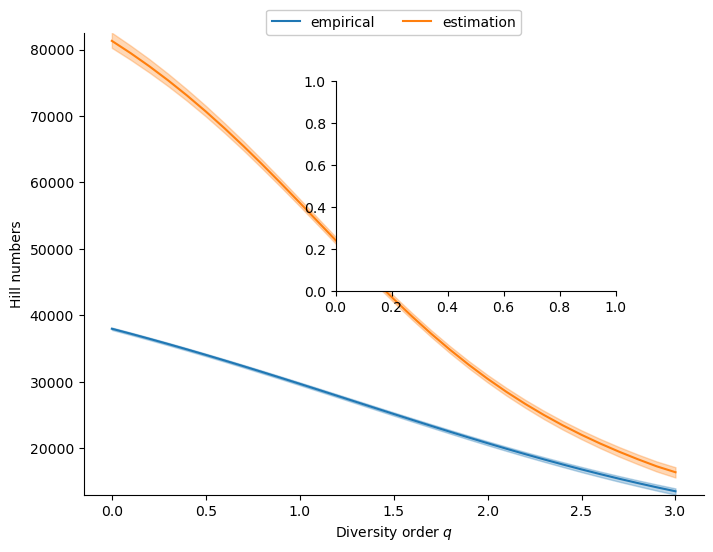

In [25]:
left, bottom, width, height = [0.44, 0.45, 0.35, 0.35]
fig, ax = plt.subplots(figsize=(8, 6))

hill_plot(emp, est, add_densities=False, ax=ax)
ax2 = fig.add_axes([left, bottom, width, height])

accumulation_curve(abundance, accumulation, c0='C2', c1='C5',
                   xlabel='documents', ylabel='works',
                   title='Species accumulation curve', ax=ax2,
                   minsample=minsample_est, xlim=(0, max_steps))
ax2.tick_params(axis='y', which='minor', left=False)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0), useMathText=True)

NameError: name 'accumulation' is not defined

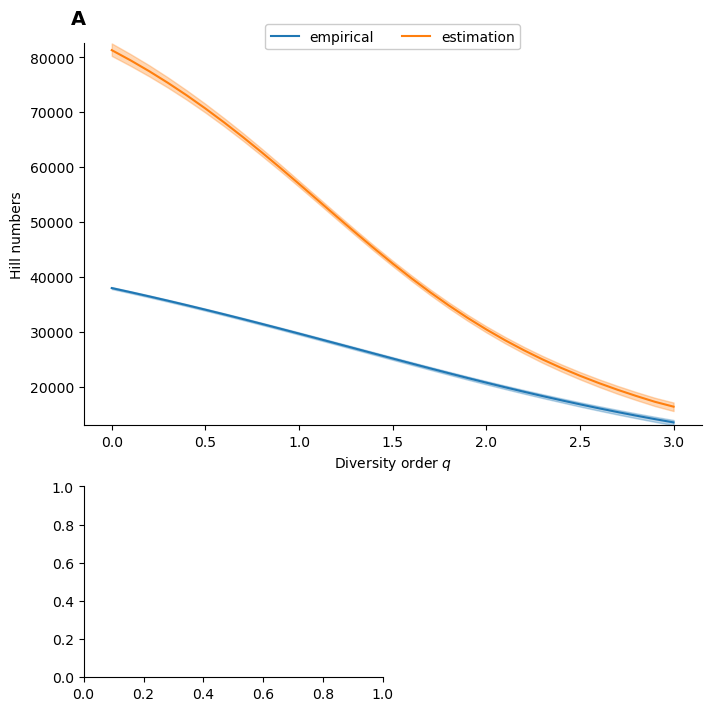

In [26]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize=(7, 7))
nrows, ncols = 3, 2
gspec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

ax = plt.subplot(gspec[:2, :2])
hill_plot(emp, est, add_densities=False, ax=ax)
ax.text(-0.02, 1.05, "A", transform=ax.transAxes, fontweight='bold', fontsize=14)

ax2 = plt.subplot(gspec[2, 0])
accumulation_curve(abundance, accumulation, c0='C0', c1='C0',
                   xlabel='Documents', ylabel='works',
                   title=None, ax=ax2,
                   xlim=(0, max_steps))
ax2.tick_params(axis='y', which='minor', left=False)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0), useMathText=True)
ax2.set_ylabel("Works")
ax2.text(-0.05, 1.1, "B", transform=ax2.transAxes, fontweight='bold', fontsize=14)

ax3 = plt.subplot(gspec[2, 1])
sb.kdeplot(minsample_est['bootstrap'], ax=ax3, color="C0", fill=True)
ax3.axvline(minsample_est['richness'], color="C0")

ax3.set(xlabel='Min. add. sample')
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0, 0), useMathText=True)
ax3.tick_params(axis='y', which='minor', left=True)
ax3.text(-0.05, 1.1, "C", transform=ax3.transAxes, fontweight='bold', fontsize=14)

plt.savefig('../outputs/all_comb.pdf');

In [27]:
assemblages = {}
for lit, df in lits.items():
    abundance = u.to_abundance(df['username'])
    assemblages[lit.title()] = abundance

In [28]:
for category, assemblage in assemblages.items():
    print('category:', category)
    print('  - original # works:', diversity(assemblage, method='chao1'))
    print('  - original # documents:', diversity(assemblage, method='minsample'))

category: Bahasa_Indonesia
  - original # works: 2575.1716537483117
  - original # documents: 56707.798702798704
category: PortuguêS_Brasileiro
  - original # works: 1851.1877636838976
  - original # documents: 25362.150891150894
category: Chinese
  - original # works: 1760.5478119228028
  - original # documents: 42789.00321800322
category: English
  - original # works: 69444.61663281126
  - original # documents: 1354852.4464804465
category: Spain
  - original # works: 6017.007159541954
  - original # documents: 94598.70893970894


/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7610214057531266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20636944972648052 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15217058653797721 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.53775640227832 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9160690546268597 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")


In [29]:
wsurvival = {}
for category, assemblage in assemblages.items():
    wsurvival[category] = survival_ratio(assemblage, method='chao1')

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 992.08it/s]


In [30]:
%matplotlib inline

/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=label,
/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=label,
/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=label,
/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=lab

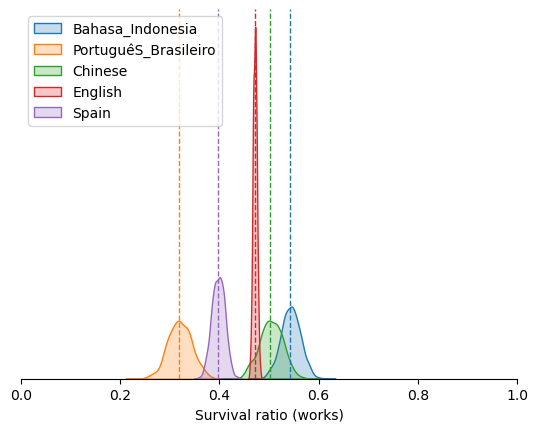

In [32]:
ax = multi_kde_plot(wsurvival)
ax.legend(loc='upper left')
ax.set_xlabel('Survival ratio (works)')
ax.set_yticklabels([])
ax.tick_params(axis='y', which='both', left=False)
ax.spines['left'].set_visible(False)
plt.savefig('../outputs/survival_works_kde.pdf')

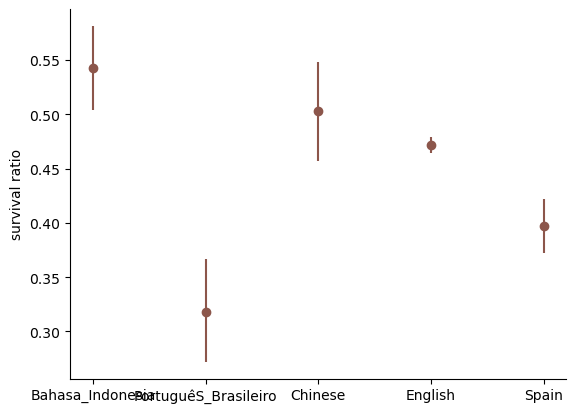

In [33]:
ax = survival_errorbar(wsurvival, ylabel="survival ratio")
ax.tick_params(axis='x', which='minor', bottom=False)
plt.savefig('../outputs/survival_works_error.pdf')

In [34]:
dsurvival = {}
for category, assemblage in assemblages.items():
    dsurvival[category] = survival_ratio(assemblage, method='minsample')

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7610214057531266 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                                  | 0/1000 [00:00<?, ?it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5946310481194814 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                          | 1/1000 [00:01<18:19,  1.10s/it]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5683822748615057 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.39167824526703043 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: U

  5%|█▉                                       | 48/1000 [00:01<00:16, 56.58it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20451884754220373 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5826430188062659 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17264860417344607 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3274178492174542 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1550737514735374 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17516252134737442 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3811654512610403 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 11%|████▎                                  | 110/1000 [00:02<00:08, 105.74it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.600416835215583 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19145789011417946 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5804039182439737 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3899278025273816 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3149273281524074 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 16%|██████▏                                | 159/1000 [00:02<00:07, 113.47it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5099785573984263 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16300085556213162 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5375662607621052 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2519176024616172 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 21%|████████                               | 208/1000 [00:02<00:07, 112.56it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24505463090827106 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4286841963912593 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4031198813499941 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.26006108159708674 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3605757616169285 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 26%|██████████                             | 257/1000 [00:03<00:06, 114.52it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5491836830296961 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14362181570868415 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3953494938214135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3924339317018166 > 0.1
  warnings.war

 31%|████████████                           | 308/1000 [00:03<00:05, 117.63it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2928522648617218 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.31327705454532406 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.300374073896819 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4186107530440495 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.33825515474381973 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24574515604763292 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17233805628711707 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6759390629013069 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17472422888022265 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6046143002422468 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josie

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21227212121812045 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23579270779373473 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5920117762580048 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.26141754323543864 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19315856307002832 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josi

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6232945861193002 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 47%|██████████████████▏                    | 466/1000 [00:05<00:04, 111.89it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.39500792032049503 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6012653776015213 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5395487588721153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.34180951913913304 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3497679640968272 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21686972305906238 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3203031493794697 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6044474599912064 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6154393039214483 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 53%|█████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3602347450614616 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.300757577715558 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 58%|██████████████████████▌                | 578/1000 [00:06<00:03, 120.97it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.254418693450134 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17231501613059663 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5552876006477163 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.34378298341471236 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5713980728432944 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1539935216314916 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4572790333259036 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.28069409373711096 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiec

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.33169325281414785 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15710527283954434 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 74%|█████████████████████████████          | 745/1000 [00:07<00:02, 107.08it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.279857727658964 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.577682008035481 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4026577563636238 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3365379249989928 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|███████████████████████████████▍       | 806/1000 [00:08<00:01, 115.40it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11784516735497164 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5294071886710299 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3882754428886983 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2700456610364199 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2747728097347135 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1604999360133661 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3274232673138613 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 87%|█████████████████████████████████▊     | 867/1000 [00:08<00:01, 112.83it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2587112549190351 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.28256979758589296 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.255188541366806 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6147427891046391 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.40813236633402994 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11491776581897284 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.435493953365949 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.28924288672351395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4281976211204892 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
100%|██████████████████████████████████████| 1000/1000 [00:09<00:00, 100.21it/s]
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20636944972648052 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  0%|                                          | 1/1000 [00:00<16:29,  1.01it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14873282901680795 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561

  6%|██▎                                      | 56/1000 [00:01<00:15, 62.75it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1004170084343059 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2761023682796804 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2643819804980012 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15950791921568452 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16734628962149145 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.12045895162736997 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17541784299828578 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10302678801235743 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 12%|████▉                                   | 124/1000 [00:02<00:08, 99.59it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16917987672059098 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.29916692926053656 > 0.1
  warnings

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14219562891958049 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21524805239459965 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 19%|███████▌                               | 194/1000 [00:02<00:07, 112.50it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10770609389146557 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2881220591334568 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23285229944303865 > 0.1
  warnings.

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3624681352011976 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23197466484634788 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.279653202942427 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.343027675691701 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 26%|██████████                             | 259/1000 [00:03<00:05, 124.38it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.26391819224954816 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2188138266792521 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2814539075625362 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 32%|████████████▌                          | 322/1000 [00:03<00:06, 109.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2672189909808367 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.33213156796773546 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15130769588358817 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14036251236393582 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3727707743855717 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10236960911788628 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16499033282525488 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3160282585849927 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 40%|███████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11890061334997881 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22548014429048635 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15161751525374711 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.29895991628291085 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17519727085527848 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 47%|█████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.28719055529654725 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 54%|████████████████████▉                  | 538/1000 [00:05<00:03, 123.25it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2780167610180797 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10298237298047752 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16904013971725362 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.25596684208721854 > 0.1
  warnings.

 62%|████████████████████████               | 617/1000 [00:06<00:03, 124.93it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.18739327828370733 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1981423233737587 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3579502997563395 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3335288949601818 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.30118451932867174 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3407454649604915 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.17567847473401343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 70%|███████████████████████████            | 695/1000 [00:06<00:02, 114.51it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.37548107848488144 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.18465528103843099 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20845582219408243 > 0.1
  warnings.

 77%|██████████████████████████████▏        | 773/1000 [00:07<00:01, 120.43it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21398873836551502 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.29950057213864056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.15136173414430232 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13909407615210512 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2790375959193625 > 0.1
  warnings.

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1764326005577459 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 85%|█████████████████████████████████      | 848/1000 [00:08<00:01, 118.12it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23182856615676428 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.30449817271801294 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16802830759479548 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.36875756999870646 > 0.1
  warnings.

 94%|████████████████████████████████████▌  | 937/1000 [00:09<00:00, 120.87it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2675520764787507 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22046695081007783 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.30296030617864744 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 95%|█████████████████████████████████████  | 950/1000 [00:09<00:00, 121.16it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11005388952980866 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561:

  3%|█▎                                       | 33/1000 [00:01<00:20, 47.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3173604681487632 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.32847418500023196 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.26247830049578624 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3563852279639832 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.30916777427592024 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23576213789056055 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14734724611298589 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3866771815519314 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|███▉                                    | 97/1000 [00:01<00:08, 103.53it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24044329039861623 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10064554582822893 > 0.1
  warnings.

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.31123704052697576 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 15%|█████▊                                 | 149/1000 [00:02<00:07, 116.29it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22907461078830238 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3883444940292975 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.33476495704780973 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.253470834944892 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19040919893632235 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.34478119755476655 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13015414443543705 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.32038000301508873 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2473271765284153 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josi

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14477569188420603 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1496947204141179 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.12811732085538097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3432314082965604 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 27%|██████████▌                            | 270/1000 [00:03<00:06, 107.94it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20135915319588094 > 0.1
  warnings.w

 32%|████████████▉                           | 323/1000 [00:03<00:07, 96.07it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3549041377900721 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3537209540590993 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.33188119347141765 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.382586424550027 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2900937285849068 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1466897688806057 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 47%|██████████████████▏                    | 467/1000 [00:05<00:04, 114.40it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2907253303183097 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24254943379673932 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.20382019279168162 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.26714279571024235 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.28816518668645585 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3374354430616222 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 54%|█████████████████████                  | 539/1000 [00:05<00:03, 116.37it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2322653772407648 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3156629237728339 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24792742867066409 > 0.1
  warnings.wa

 61%|███████████████████████▉               | 614/1000 [00:06<00:03, 120.31it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22275865388655802 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.25533581413401407 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16559273597522406 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19338567024715303 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3841888951847068 > 0.1
  warnings.

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14792371389376058 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.14047626994215534 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 69%|██████████████████████████▉            | 690/1000 [00:06<00:02, 118.66it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1431177121539804 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.37469208530637843 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.10297355964576127 > 0.1
  warnings.

 75%|█████████████████████████████▎         | 753/1000 [00:07<00:02, 119.05it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1602339822693466 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1910100900076941 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.16380641027353704 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13352095847585588 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21167536814573396 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3276813018364919 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.282175283136894 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.19908017010311596 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.40726520726821036 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4220355857669347 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 82%|█████████

 90%|███████████████████████████████████    | 898/1000 [00:08<00:00, 118.14it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1756851969021227 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.26698621994546556 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1756294671613432 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3231712439974217 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.24582430996633775 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3416914770969015 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.28031873291547527 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3369009815833124 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2155577957892092 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23038982250000117 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiec

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.437964020296931 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  2%|▊                                        | 21/1000 [00:01<00:38, 25.57it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.980187310255133 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.25284037401434 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.78293686755933 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9621875102166086 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.33001745690126 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  6%|██▌                                      | 62/1000 [00:01<00:13, 71.09it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.189752952661365 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.940802172175609 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.547551541705616 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3326764587545767 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.86343944107648 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.263497820007615 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 10%|████▏                                   | 104/1000 [00:02<00:09, 93.64it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.669849408906884 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.953726418782026 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.689388853032142 > 0.1
  warnings.warn(f"

 15%|█████▉                                  | 147/1000 [00:02<00:08, 96.93it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.235517181805335 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.008979357546195 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.140411900589243 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.097019776003435 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.982321217423305 > 0.1
  warnings.warn(

 19%|███████▍                               | 191/1000 [00:02<00:07, 105.70it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.501844183774665 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.614980407524854 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.275715773110278 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.753160758060403 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.740765005815774 > 0.1
  warnings.warn(f

 24%|█████████▏                             | 235/1000 [00:03<00:07, 107.13it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.370448896661401 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.324111993657425 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.84245920914691 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.130111562204547 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.489250272279605 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.27585308405105 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.977610498201102 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 28%|██████████▉                            | 279/1000 [00:03<00:07, 101.96it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.873639750527218 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.5351044493727386 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.678325542830862 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.201367634814233 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.166157055879012 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.07544169924222 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.01853652461432 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 32%|████████████▌                          | 323/1000 [00:04<00:06, 101.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.742595812189393 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.157313634525053 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 3.209971330477856 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.609802168793976 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 2.6862677567405626 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.44076924584806 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 36%|██████████████▌

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.35859562875703 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1152944657951593 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.895441267406568 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.122427700203843 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 40%|████████████████▏                       | 405/1000 [00:05<00:06, 94.47it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.511578550678678 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.326862579560839 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.53156664641574 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 44%|█████████████████▊                      | 445/1000 [00:05<00:06, 90.25it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.135725285159424 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.941222990048118 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.4039748479845 > 0.1
  warnings.warn(f"To

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.516374214552343 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 48%|███████████████████▍                    | 485/1000 [00:05<00:05, 92.52it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 24.326105369487777 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6110228465404361 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.166651512496173 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.419569569057785 > 0.1
  warnings.warn(

 52%|█████████████████████                   | 525/1000 [00:06<00:05, 91.65it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.680247103678994 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.077891422668472 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.576691483147442 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.583645552629605 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.981991604552604 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.760042720939964 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.55601509299595 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 57%|██████████████████████▊                 | 570/1000 [00:06<00:05, 78.56it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.527165382052772 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.938128930167295 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.898527905344963 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.032747063902207 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 61%|████████████████████████▎               | 609/1000 [00:07<00:05, 68.69it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.630397913395427 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.352821200620383 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.57363591378089 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.275743116158992 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.549728253739886 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 65%|█████████████████████████▉              | 649/1000 [00:08<00:04, 71.96it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 15.221361019997858 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.5813772703986615 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.881612326484174 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.806816802127287 > 0.1
  warnings.warn(

 69%|███████████████████████████▌            | 689/1000 [00:08<00:04, 69.76it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.592890515108593 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.324976628180593 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.69797719665803 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.845773373614065 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.060221279039979 > 0.1
  warnings.warn(f

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 5.7928852492477745 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.158166293171234 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.207446406129748 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.963198643992655 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8719642492942512 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.77952330210246 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.422171718557365 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 17.48953032796271 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7589959951583296 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 78%|███████████████████████████████         | 775/1000 [00:09<00:03, 73.16it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 13.693537042359821 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 16.952802581363358 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.108879712061025 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 6.304784431820735 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 8.104592680581845 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.524558472214267 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 82%|█████████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 22.07612964406144 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 12.136179585941136 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.29417896119412 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 86%|██████████████████████████████████▎     | 857/1000 [00:10<00:01, 77.76it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.6734837398398668 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.52813697385136 > 0.1
  warnings.warn(f"

 90%|███████████████████████████████████▊    | 895/1000 [00:11<00:01, 85.59it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 7.7403812856646255 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 21.856803828151897 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 18.579061504919082 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.9008937284816056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.43211134255398 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 9.217429991578683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 20.832667541340925 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.752314724377356 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 10.979409850086085 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 23.991949701099657 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9302121758228168 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 14.33050064893905 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 19.139010383398272 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 4.2870230950647965 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 98%|███████████████████████████████████████▎| 984/1000 [00:12<00:00, 90.33it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 11.176824934547767 > 0.1
  warnings.warn(

  2%|▉                                        | 23/1000 [00:01<00:37, 26.32it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5159766159194987 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0210692212713184 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9355717508733505 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4600620209675981 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5405347952328157 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3942383328540018 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5699548219854478 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5258860132016707 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
  7%|██▊                                      | 70/1000 [00:01<00:12, 76.37it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5486800423823297 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.22904423269210383 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.755965255695628 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2531908719392959 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21321369841462 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6028054278576747 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 12%|████▌                                   | 115/1000 [00:02<00:09, 96.53it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2757074187829858 > 0.1
  warnings.warn(f"

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8437873617367586 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0605611076462083 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6869220150329056 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9157623196224449 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2309737712566857 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 16%|██████▏   

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3634466381772654 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2826638413098408 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5680098583106883 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 20%|████████                                | 203/1000 [00:03<00:08, 99.01it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3466022319553304 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.43288691535417456 > 0.1
  warnings.war

 25%|█████████▋                             | 248/1000 [00:03<00:07, 105.43it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2294852633131086 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1753053340362385 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7036079091194551 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6796219614552683 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2555962723563425 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4992524843182764 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2604529757372802 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3045941063683131 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4632216677200631 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3042859818087891 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4257632484805072 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2313068822113564 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.483419834432425 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2831461869791383 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3507446574221831 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 35%|███████████

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1966854611237068 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7021217398578301 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1361592875764472 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4686047488285112 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.7322808692551916 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josieche

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.2348045072867535 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5298691662901547 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 43%|█████████████████▏                      | 430/1000 [00:05<00:06, 94.22it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.231194854968635 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1049598679092014 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6917106436303584 > 0.1
  warnings.warn(

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2930522902752273 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8150296424428234 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1170165239891503 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0520895399386063 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.36401383609336335 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiech

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.48365952298627235 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.264722469735716 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 52%|████████████████████▊                   | 521/1000 [00:06<00:05, 93.09it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8550530048596556 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5070175698128878 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.11344515442033298 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23258216470276238 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.294849608115328 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.1886553438671399 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8003796428383794 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 57%|██████████████████████▉                 | 572/1000 [00:06<00:04, 91.54it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6494430464445031 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.35601692969794385 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 62%|████████████████████████               | 616/1000 [00:07<00:03, 101.34it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.23908761816710467 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6972944297303911 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.33774962516326923 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.016843720979523 > 0.1
  warnings.wa

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5767891496652737 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8133218528309953 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.4432953201030614 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.464003478322411 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6359028276856407 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.5141019307338865 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4765230582561344 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8152405350847403 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.42960065468651 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.330921755390591 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/D

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5022888904859428 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 76%|██████████████████████████████▍         | 760/1000 [00:08<00:02, 93.28it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4702960740760318 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.21911696688039228 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.42742412300867727 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.48755612856621156 > 0.1
  warnings.w

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.13791403508366784 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.2748499507506494 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1972792935339385 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9797778279098566 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 81%|████████████████████████████████▍       | 810/1000 [00:09<00:02, 91.48it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.6308799127000384 > 0.1
  warnings.war

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.8322238641776494 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.1534746959805489 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.32796586405311245 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5499752576288301 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3159920190519188 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
 87%|█████████

 91%|████████████████████████████████████▍   | 911/1000 [00:10<00:00, 91.61it/s]/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.3939139662979869 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.5563602245092625 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.9268078983805026 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.0053485435200855 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4441783280562959 > 0.1
  warnings.warn

/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.18580959714745404 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3663938243262237 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 0.36747809375083307 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.3515815551072592 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiechen/Desktop/copia/estimators.py:561: UserWarning: Tolerance criterion not met: 1.4562740895489696 > 0.1
  warnings.warn(f"Tolerance criterion not met: {diff_intersect} > {tolerance}")
/Users/josiec

/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=label,
/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=label,
/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=label,
/Users/josiechen/desktop/copia/plot.py:257: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(assemblage['bootstrap'], label=lab

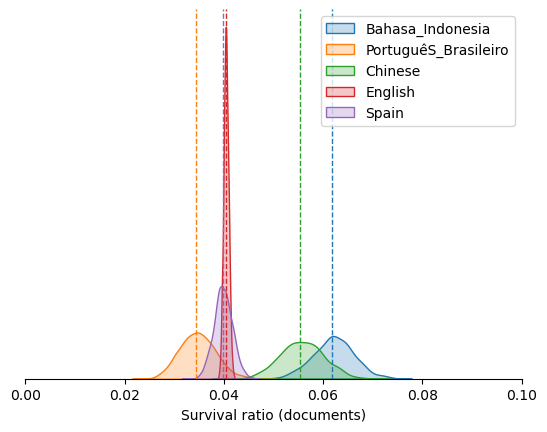

In [35]:
ax = multi_kde_plot(dsurvival)
ax.legend(loc='upper right')
ax.set_xlim((0, 0.1))
ax.set_yticklabels([])
ax.tick_params(axis='y', which='both', left=False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Survival ratio (documents)')
plt.savefig('../outputs/survival_docs_kde.pdf')

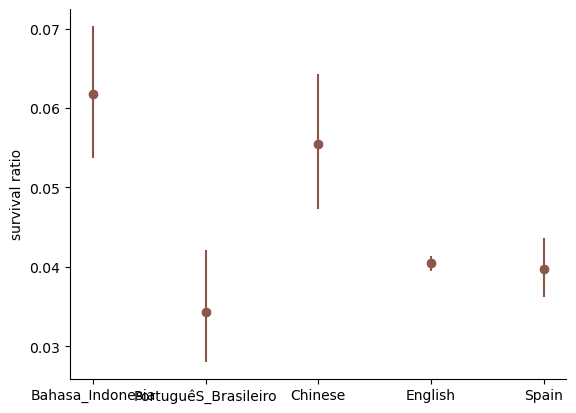

In [36]:
ax = survival_errorbar(dsurvival, ylabel="survival ratio")
ax.tick_params(axis='x', which='minor', bottom=False)
plt.savefig('../outputs/survival_docs_error.pdf')

In [37]:
for c in 'CH1 CH1-lCI CH1-uCI MS MS-lCI MS-uCI'.split():
    stats_df[c] = 0.0

# for individual languages:
for lang in wsurvival:
    stats_df.loc[lang.lower(), 'CH1'] = wsurvival[lang]['survival']
    stats_df.loc[lang.lower(), 'CH1-lCI'] = wsurvival[lang]['lci']
    stats_df.loc[lang.lower(), 'CH1-uCI'] = wsurvival[lang]['uci']

for lang in dsurvival:
    stats_df.loc[lang.lower(), 'MS'] = dsurvival[lang]['survival']
    stats_df.loc[lang.lower(), 'MS-lCI'] = dsurvival[lang]['lci']
    stats_df.loc[lang.lower(), 'MS-uCI'] = dsurvival[lang]['uci']
    
# for union:
stats_df.loc['all', 'CH1'] = wsurvival_all['survival']
stats_df.loc['all', 'CH1-lCI'] = wsurvival_all['lci']
stats_df.loc['all', 'CH1-uCI'] = wsurvival_all['uci']

stats_df.loc['all', 'MS'] = dsurvival_all['survival']
stats_df.loc['all', 'MS-lCI'] = dsurvival_all['lci']
stats_df.loc['all', 'MS-uCI'] = dsurvival_all['uci']

stats_df.round(3)

f1    f2      S      n    CH1  CH1-lCI  CH1-uCI  \
language                                                                    
bahasa_indonesia         787   263   1398   3505  0.543    0.504    0.581   
português_brasileiro    458    83    589    871  0.318    0.272    0.366   
chinese                  504   145    885   2371  0.503    0.457    0.548   
english                21462  6273  32731  54772  0.471    0.464    0.479   
spain                   1706   401   2389   3759  0.397    0.373    0.422   
all                    24917  7165  37992  65278  0.467    0.460    0.474   

                          MS  MS-lCI  MS-uCI  
language                                      
bahasa_indonesia       0.062   0.054   0.070  
português_brasileiro  0.034   0.028   0.042  
chinese                0.055   0.047   0.064  
english                0.040   0.039   0.041  
spain                  0.040   0.036   0.044  
all                    0.039   0.038   0.040

In [38]:
hill_est = {}
for lang, assemblage in assemblages.items():
    emp, est = hill_numbers(assemblage, n_iter=1000)
    hill_est[lang] = est

100%|███████████████████████████████████████| 1000/1000 [01:53<00:00,  8.80it/s]


In [39]:
evennesses = {l:evenness(hill_est[l]) for l in hill_est}

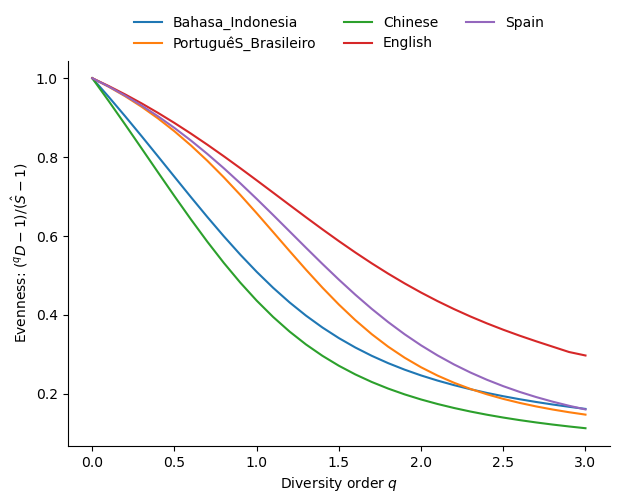

In [40]:
ax = evenness_plot(evennesses, figsize=(7, 5))
ax.tick_params(axis='y', which='minor', left=True)
lines, labels = ax.get_legend_handles_labels()
ax.set_title(None)
ax.legend(lines, labels, loc = 'upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), frameon=False)
plt.savefig('../outputs/evenness.pdf')

KeyError: 'chinese'

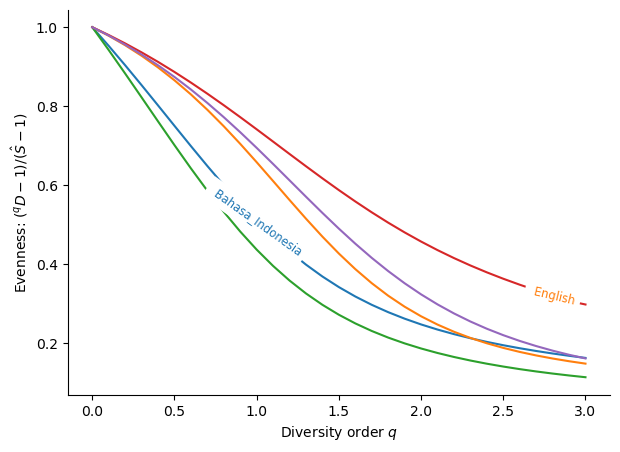

In [41]:
ax = evenness_plot(evennesses, figsize=(7, 5))
ax.tick_params(axis='y', which='minor', left=True)
lines, labels = ax.get_legend_handles_labels()
ax.set_title(None)
# ax.legend(lines, labels, loc = 'upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), frameon=False)
ax.get_legend().remove()

qs = np.arange(0, 3.1, 0.1)

ax.text(qs[10], evennesses['Bahasa_Indonesia'][10], " " + "Bahasa_Indonesia",
        size="small", bbox=dict(facecolor='white', edgecolor="None", alpha=1),
        color="C0", ha="center", va="center", rotation=-35.5)

ax.text(qs[28], evennesses['English'][28], " " + "English",
        size="small", bbox=dict(facecolor='white', edgecolor="None", alpha=1),
        color="C1", ha="center", va="center", rotation=-13.5)

ax.text(qs[8], evennesses['chinese'][8], " " + "chinese",
        size="small", bbox=dict(facecolor='white', edgecolor="None", alpha=1),
        color="C2", ha="center", va="center", rotation=-42.5)

ax.text(qs[20], evennesses['Português_brasileiro'][20], " " + "Português_brasileiro",
        size="small", bbox=dict(facecolor='white', edgecolor="None", alpha=1),
        color="C3", ha="center", va="center", rotation=-16.5)

ax.text(qs[15], evennesses['spain'][15], " " + "spain",
        size="small", bbox=dict(facecolor='white', edgecolor="None", alpha=1),
        color="C5", ha="center", va="center", rotation=-9.5)


plt.savefig('../outputs/evenness-inset-text.pdf')

In [ ]:
import matplotlib.pyplot as plt


from matplotlib.lines import Line2D

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7), sharey=True)
axes = axes.flatten()

for i in range(1, 6):
    evennesses = {l:evenness(hill_est[l], E=i) for l in hill_est}
    ax = evenness_plot(evennesses, xlabel="Diversity order $q$", ylabel="Evenness", ax=axes[i-1])
    ax.set_title(f"$E_{i}$")
    ax.tick_params(axis='y', which='minor', left=True)
    ax.get_legend().remove()
axes[-1].remove()  # don't display empty ax

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', ncol=6, bbox_to_anchor=(0.5, 1.05), frameon=False)

plt.tight_layout()

plt.savefig(f"../outputs/evenness-plots.pdf", bbox_inches='tight')

In [ ]:
comp = []

for estimator in ['chao1', 'jackknife', 'ichao1', 'egghe_proot']:
    for category, assemblage in assemblages.items():
        surv = survival_ratio(assemblage, method=estimator, n_iter=1000)
        comp.append([category, estimator, surv['survival'], surv['lci'], surv['uci']])
        
comp = pd.DataFrame(comp, columns=['tradition', 'estimator', 'survival', 'lci', 'uci'])

In [ ]:
estimates = comp.sort_values(['tradition', 'estimator'])
estimates

In [ ]:
estimates["estimator"] = estimates["estimator"].str.replace("_", " ")

In [ ]:
errors = np.array(list(zip(estimates['lci'], estimates['uci']))).T
errors[0] = estimates['survival'] - errors[0]
errors[1] -= estimates['survival']

fig, ax = plt.subplots(figsize=(12, 8))

traditions = sorted(set(estimates['tradition']))
color_dict = {t: f"C{i}" for i, t in enumerate(traditions)}
labeled = {t:False for t in color_dict}

for idx in range(len(estimates)):
    trad = estimates['tradition'].iloc[idx]
    meth = estimates['estimator'].iloc[idx]
    label = trad if not labeled[trad] else None
    c = color_dict[trad]
    labeled[trad] = True
    ax.errorbar(idx, estimates['survival'].iloc[idx],
        yerr=np.array([errors[:, idx]]).T,
        fmt='.', c=color_dict[trad], label=label,
        ms=12)


ax.set_ylabel('Survival ratio (works) for different\ncombinations of estimators and traditions', fontsize=14)
ax.set_xticks(np.arange(len(estimates)))
ax.set_xticklabels(estimates['estimator'], rotation = 90)
ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='y', which='minor', left=True)
ax.legend(loc='upper center', ncol=len(assemblages), bbox_to_anchor=(0.5, 1.05), frameon=False, fontsize=14)

plt.savefig('../outputs/other.pdf');